## 4.2 Sentiment analysis

After looking at the polarities of the two dictionary approaches we decided to take the polarity scores generated from the TextBlob library as they seem to be more meaningful for the further analysis. Here it should be noted that all dictionary based approaches are limited in their capacity to clearly identify sentiment in each and every case but we will look further into this in the validation part. <br>
It should be considerd that there exist other approaches to sentiment analysis in automated media content analysis. For example there are unsupervised BERT models build for sentiment analysis of german texts. We decided against them in this scientific work because the implementation is rather resource heavy and the results are not necessarily better. In further work one could very well try out more approaches in that direction. Also the posibility of supervised machine-learning approaches would be attainable if the data was to be labeled by human coders but as we have over 100000 tweets in our corpus this approach would take too much time. A semi-supervised approach could be the way to go here and should definetly be considered for future research. <br>
As we now progress to the analysis of the results from the sentiment models, we want to evaluate them in a way fitting to our research questions. In one aspect we want to look at the sentiments for tweets and speeches of the different German parties from the 19. Bundestag to answer the question whether there are noticable differences in between the text platforms or parties for the individual politicians. We also want to look at the difference between female and male politicians in the Bundestag to see if we can spot differences in their sentiment also with regard to their parties. In a last step we will look at the trends over time for sentiment in tweets and speeches for all individual politicians and by looking at some chosen politicians if we can maybe see understandable trends based on the events in German politics.

### 4.2.1 Results for Twitter Data

In [1]:
#import packages
from scipy.ndimage.filters import gaussian_filter1d
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

import pandas as pd
from textblob_de import TextBlobDE as TextBlob
import numpy as np
from tqdm.notebook import tqdm

import re
import pickle
pd.options.mode.chained_assignment = None  # default='warn' based on false positives

tqdm.pandas()

First of all we imported our preprocessed corpus and sentiment table for the politicians for the Twitter data into the notebook to work with it.

In [2]:
#import the data 
sentiment_tweets=pd.read_csv("../data/processed/sentiment_scores_twitter_01.csv")
pre_data_twitter= pickle.load(open('../data/processed/tweets_processed.p','rb'))

#### 4.2.1.1 Analysis of Political Parties

For the first part, we want to look at the question how the sentiment for Twitter tweets differs between the different parties in the Bundestag. 

Starting of the analysis, we compute the means of the average polarity scores for the six different parties. In addition we also sum up the total number of positive, negative and neutral tweets for each individual party. With this first look we are already able to see some differences between the parties. For the mean polarity we can clearly see that the CDU has the most positive value followed the SPD. It may not be surprising that those two parties are on top because they were the governing parties in the 19. Bundestag. Therefore when talking about political contents especially on social media to their followers it doesn't seem far fetched. They will most likely have good things to say about their political decisions. <br>
The other pair that is in the middle of the park regarding the sentiment scores are the FDP and Die Grünen. Although they did not govern in this period of the Bundestag and formed the opposition their sentiment seems to be not far behind SPD. This could have multiple reasons one of them being that the political program posed by those four parties is in general not far apart as all four make politics for the middle of the society. Another reason may could be that the SPD party wasn't as satisfied with its job as governing party as the CDU. This could be a result of the power the formerly more voted CDU had in the talks forming the government. <br>
The parties with the far more negative sentiment seem to be Die Linke and AFD. In both cases this most likely is the result of a more alternative party program than those of the parties in the middle. For the AFD it is widely known that they critize German politcs and policy making from the governing parties as they feel like the system does not serve the people well in a democracy. From a more critical standpoint one may say their more radical views on hot topics in politics make them unfavorable with the other parties. As for Die Linke they also have more alternative programs that deviate from the political middle but also from the AFD. Also as one of the more socialist parties a government that is mostly formed from conservative CDU may cause a lot of discussing that can be expressed with more negative sentiment on social media. <br>
Overall the differences in polarity don't seem to be too great but as we saw there still seem to be some noticeable groupings. When thionking about sentiment we also should not forget that those means may be very skewed through outliers in the sentiment even though the range of values is only between -1 and 1. Another point were one needs to be cautious when analyzing this score is also the null point as it doesn't necessarily mean that a tweet sentiment is neutral if it has polarity 0 but for simplicity we will assume it. 

With regards to the absolute numbers of positive, negative, and neutral tweets we can see that FDP, SPD ,and AFD have the most tweets overall though with FDP and SPD most of their tweets are positive and neutral where as the most tweets from AFD are negative. This seems to support our findings in the polarity scores even further. On the other side, CDU has the least amount of tweets in total and the least amount of negative tweets once again supporting the previous observations. <br>
Another possibel explenation for the most positive polarity of the CDU may as well lies in the lower number of overall tweets and the proportionatly high amount of positive tweets. This could be an indicator that the CDU tweets are skewed or maybe are not as representative as the tweet corpi for the other parties.

In [4]:
#compute the mean for Polarity and sum over number of tweets from the six parties represented
CDU_polarity = np.mean(sentiment_tweets['Polarity_mean'][0:7])
print('CDU Sentiment: ',CDU_polarity)
FDP_polarity = np.mean(sentiment_tweets['Polarity_mean'][7:14])
print('FDP Sentiment: ',FDP_polarity)
SPD_polarity = np.mean(sentiment_tweets['Polarity_mean'][14:21])
print('SPD Sentiment: ',SPD_polarity)
GRUENE_polarity = np.mean(sentiment_tweets['Polarity_mean'][21:28])
print('GRUENE Sentiment: ',GRUENE_polarity)
LINKE_polarity = np.mean(sentiment_tweets['Polarity_mean'][28:35])
print('LINKE Sentiment: ',LINKE_polarity)
AFD_polarity = np.mean(sentiment_tweets['Polarity_mean'][35:42])
print('AFD Sentiment: ',AFD_polarity)
print( )

for category in ['Num_pos_tweets','Num_neutral_tweets','Num_neg_tweets']:
    CDU_cat = np.sum(sentiment_tweets[category][0:7])
    print('CDU ',category,': ',CDU_cat)
    FDP_cat = np.sum(sentiment_tweets[category][7:14])
    print('FDP ',category,': ',FDP_cat)
    SPD_cat = np.sum(sentiment_tweets[category][14:21])
    print('SPD ',category,': ',SPD_cat)
    GRUENE_cat = np.sum(sentiment_tweets[category][21:28])
    print('GRUENE ',category,': ',GRUENE_cat)
    LINKE_cat = np.sum(sentiment_tweets[category][28:35])
    print('LINKE ',category,': ',LINKE_cat)
    AFD_cat = np.sum(sentiment_tweets[category][35:42])
    print('AFD ',category,': ',AFD_cat)
    print( )

CDU Sentiment:  0.2701342852272904
FDP Sentiment:  0.1492770435443622
SPD Sentiment:  0.18602910130679942
GRUENE Sentiment:  0.15326341675108265
LINKE Sentiment:  0.01763933986685003
AFD Sentiment:  -0.007195947721027972

CDU  Num_pos_tweets :  5539
FDP  Num_pos_tweets :  12447
SPD  Num_pos_tweets :  10435
GRUENE  Num_pos_tweets :  6577
LINKE  Num_pos_tweets :  6118
AFD  Num_pos_tweets :  7370

CDU  Num_neutral_tweets :  6427
FDP  Num_neutral_tweets :  16768
SPD  Num_neutral_tweets :  13001
GRUENE  Num_neutral_tweets :  7534
LINKE  Num_neutral_tweets :  8167
AFD  Num_neutral_tweets :  15543

CDU  Num_neg_tweets :  2467
FDP  Num_neg_tweets :  6622
SPD  Num_neg_tweets :  6255
GRUENE  Num_neg_tweets :  3700
LINKE  Num_neg_tweets :  6066
AFD  Num_neg_tweets :  7260



#### 4.2.1.2 Analysis of Gender Differences

In the second part we want to look at the difference in sentiment between female and male politicians to see if there are some noticeable findings.

First of we again compute the means for the polarity score and sum up the number of positive, negative ,and neutral tweets from female and male politicians. At first glance we can see that the total number of female tweets is way lower than male tweets which can be attributed to the selection of politicians made for the analysis but also due to the fact that the percentage of female politicians in the 19. Bundestag was around 30%. <br>
For the polarity scores we see that the male scores are a little higher than female scores but the difference is not as striking as for the different parties. Also from the absolute number we can't see big changes in the proportions of positive, negative, and neutral tweets. Again we could argue that the comparison would be fair only if we had a more similar number of tweets for male and female politicians as for the smaller number of female tweets there are more likely to be skewed for example if one female politician tweets very much. <br>
But all in all we can't make many conclusions from these observations. It would be kind of a reach to assume that male politicians have a more positive sentiment in general. What may be a valid explenation for this gap is that female politicians may post more about pressing issues for women in our society.

In [5]:
#compute the mean for Polarity and sum over number of tweets for male and female politicians
female_polarity= np.mean(sentiment_tweets.loc[sentiment_tweets['Name'].isin(['Nadine Schön' ,'Bettina Stark-Watzinger','Marie-Agnes Strack-Zimmermann','Saskia Esken' ,'SteffiLemke' ,'Katrin Göring-Eckardt' ,'Britta Haßelmann' ,'Annalena Baerbock (Archiv)','Sahra Wagenknecht' ,'Sevim Dağdelen, MdB','Alice Weidel' ,'Beatrix von Storch'])]['Polarity_mean'])
print('Female Sentiment:',female_polarity)
for category in ['Num_pos_tweets','Num_neutral_tweets','Num_neg_tweets']:
    female_cat = np.sum(sentiment_tweets.loc[sentiment_tweets['Name'].isin(['Nadine Schön' ,'Bettina Stark-Watzinger','Marie-Agnes Strack-Zimmermann','Saskia Esken' ,'SteffiLemke' ,'Katrin Göring-Eckardt' ,'Britta Haßelmann' ,'Annalena Baerbock (Archiv)','Sahra Wagenknecht' ,'Sevim Dağdelen, MdB','Alice Weidel' ,'Beatrix von Storch'])][category])
    print('Female ',category,': ',female_cat)
    
print( )
male_polarity= np.mean(sentiment_tweets.loc[~sentiment_tweets['Name'].isin(['Nadine Schön' ,'Bettina Stark-Watzinger','Marie-Agnes Strack-Zimmermann','Saskia Esken' ,'SteffiLemke' ,'Katrin Göring-Eckardt' ,'Britta Haßelmann' ,'Annalena Baerbock (Archiv)','Sahra Wagenknecht' ,'Sevim Dağdelen, MdB','Alice Weidel' ,'Beatrix von Storch'])]['Polarity_mean'])
print('Male Sentiment:',male_polarity)
for category in ['Num_pos_tweets','Num_neutral_tweets','Num_neg_tweets']:
    male_cat = np.sum(sentiment_tweets.loc[~sentiment_tweets['Name'].isin(['Nadine Schön' ,'Bettina Stark-Watzinger','Marie-Agnes Strack-Zimmermann','Saskia Esken' ,'SteffiLemke' ,'Katrin Göring-Eckardt' ,'Britta Haßelmann' ,'Annalena Baerbock (Archiv)','Sahra Wagenknecht' ,'Sevim Dağdelen, MdB','Alice Weidel' ,'Beatrix von Storch'])][category])
    print('Male ',category,': ',male_cat)

Female Sentiment: 0.10096327301976364
Female  Num_pos_tweets :  11847
Female  Num_neutral_tweets :  16402
Female  Num_neg_tweets :  7394
Male Sentiment: 0.13561700653483708
Male  Num_pos_tweets :  36639
Male  Num_neutral_tweets :  51038
Male  Num_neg_tweets :  24976


#### 4.2.1.3 Analysis of Politicians over Time

As a third step, we will look at the individual politicians over time and compute their polarity over time. Therefore, we need to plot their tweets polarity over time and visualize them in a way we can see the trends over time. <br>
We will do so by creating a loop going through all the politicians we want to analyze. Starting by getting the preprocessed data for each politician, we again apply TextBlob to compute the sentiment of each tweets for each individual politician. Afterwards we take the polarity and the dat of the post and use them as initial values for our plot. As we are looking at a period a little short of four years it isn't helpful to look at the polarity for each day. Rather we will look at a smoothed line from month to month to find out about the trends over time. Therefore, we use a gaussian filter to smooth the plot line which else jumps a lot due to the high frequency of tweets getting posted. In applying the filter we use the sigma value to control how much the line is getting smoothed and are adjusting the value of sigma according to the number of tweets from the politician. In the end, we aer left with graphs which are named after the politician they are representing and display the polarity score over time where the time steps are taken in months.

After execution we are left with 42 graphs each for one politician. As it would be too much work to make an analysis of each graph we will only choose one politician from each party to analyze as this should proof useful in determining the sentiment trend not only for the individual politician but also for the party.

First, we are strating with the CDU where we will take a look at the polarity over time for Jens Spahn how was also the minister of health in that time period. When looking at his overall trend the movement is rather sideways but in recent years there are more steep falls and climbs in his graph. This can maybe be contributed to the ongoing Corona crisis in Germany and around the globe. As he was the minister of health it can be assumed that he often tweeted about the current situation and therefore had very bad and very good news over this time span. We see a significant drop in the polarity around March 2021 where the third Corona wave was hitting Germany and in the near east the situation in Isreal was escalating. Those event could have contributed that for example in this period the sentiment of his tweets was getting negative. In comparison from July on the sentiment was rather positive as for other CDU politicians. This may be contributed to the coming votings and their positive markting for their party.

Secondly, we will look at the FDP in form of Christian Lindner who was at the time chairman for his party. His overall trend seems to be moving upwards over time as he starts out very negative at the beginning of the 19. Bundestag. This could be a result of the failed talks over forming the government with CDU and Die Grünen which he was heavily critizised for. Overall his polarity is lower than what we have seen for Jens Spahn and in fact for almost every CDU politician. This is something we have seen coming when considering our previous results. For him we also see little drops when Corona waves were hitting Germany but the drops are not as steep as for Jens Spahn. This could signal that he was not as involved into the actions take and the consequences for Germany during the Corona crisis. It couls also mean that he also saw chances to do better in the crisis and had a more optimistic outlook. We also see a spike in April 2019 where he was reelected as chairman of the FDP.

Thirdly, we will look at the SPD in form of Karl Lauterbach the current minister of health. With his tweet sentiment we see a very low average level which may not be surprising as he is known to make rather pessimistic comments especially about the Corona crisis. We can't see a clear trend but he seems to get more positive over time. With a big steep upward sloap beginnign in May of 2020 right around where the first Corona wave and lockdown ended. As he is a expert for medical affairs it is not surprising that his sentiment seem to be more varying since the Corona crisis. In comparison to the other SPD politicians he seems to be more negative in his tweets with only Saskia Esken having similar levels of polarity. As mentioned this may come from his more critical thinking especially when talking about medical questions.

As for die Grünen we want to look at the Twitter sentiment of Annalena Baerbock chairwoman of her party. Similar to Lindner her sentiment starts of rather low as her party was also in the talks to form a government but it did not work. We also see the Corona drops with her also in not a very extreme fashion. Around September 2019 we see a steep upward sloap when the Landtagswahlen were. We see another peak at the beginning of October 2020 while there were communal elections in Germany. This also signals that she wanted to make positive promotion for her party and their candidates. What may is surprising with her graph is the decline right after the first lockdown ended June 2020. There we might would have expected a more positive sentiment. The reason could be the #blacklivesmatter discussion around the world or climate risks in policy making around the automobile industry which of course in Germany is a big topic.

Next we want to look at the sentiment over time for Die Linke in form of Sahra Wagenknecht a former leader of the party and for many a symbol of the party. As with Karl Lauterbach we can see that she has an overall lower polarity score than most politicians from CDU or SPD. This is a trend we can see for almost every Die Linke politician we are looking at. For Wagenknecht we can see two very sigificant drops in her polarity score once from end 2018 to March 2019 and a second time from July 2019 until September 2019. The first drop can be associated with her backing down from becoming chairwoman of the paty and with her aspiration to back off from the party after she herself could not support the direction Die Linke took. The second drop can be seen as a major critic on many aspects in Germany society that were induced in her view by bad and old fashioned politics. Especially, she critizised many parties and politicians with their ties to big economic players and the money on the side they are making with them. There she addresses a rather serious issue for a democracy because she implies that the politicians are not acting for the greater good of the people but for their own benefits.

Lastly, we take a look at the sentiment for AFD in form of Alice Weidel the former leader of AFD. As already seen, the AFD politicians have a very low overall polarity score which could be attributed to their very alternative programs and views in comparison to the other parties in the Bundestag. For Weidel, we can see the dips in her graph for the Corona waves as with the most other politicians. In her case and maybe also for other AFD politicians the reasons behind this may not be that they are talking about the serious time and dangers of Corona but rather the critic on the measures taken by the government. Especially Weidel has posted a lot about how the in her view wrong decisions of the government have brought Germany into the crisis and are going to destroy the democratic order if actions are not reverted. What is also interesting is the big rise in April 2021 and fall from June 2021. The rise can be attributed to to communal election which she made positive promotions for. The fall is again caused by critic at the politics and the German government.

All in all, we see that the politicians of the Bundestag follow a trend in sentiment on Twitter that is largely influenced by the political events taking place and decisions made in politics. For most of them we can see that the trends for politicians from the same party seem to be somewhat similar for bigger events but can deviate drastically depending on tweets about regional events or tweets that may express more personal views on political topics. Nevertheless, we see parallels between their actions in politics and their Twitter sentiments that for the most part are in line with their parties orientation. <br>
So to partially answer our first research question in this regard we can see that the trend found in the sentiment of the parties seems to be found in most politicians from the party. Therefore, we get a somewhat representative idea of an individuals sentiment if we look at the party they are part of. For the most part the governing parties had the most positive sentiment and the parties that were further away from the political middle had a more negative sentiment. As we already said one reason for that could be the acceptance of the politics made which is of course the highest in the governing parties. We will have to go further with the analysis to see if the same thing can be noticed with the Bundestag speeches of the politicians. <br>
As for the difference between male and female politicians we can't really spot some significant differences. Even though some of the female politicians we looked at had a more negative sentiment overall this can hardly be attributed to the gender of the person but more to the parties they are in and the parts of the party they are representing. We can therefore assume that the differences from the previous analysis are mostly due to the selected population for this analysis. <br>
So for the second research question addressed here we see that the gender of a Bundestags politician has little to no noticeable influence on the sentiment of their tweets. We definitely would need to make more research in this direction to come to some conclusions but from the data we collected here no clear connection could be found. <br>
As already mentioned the individual politicians seem to be influenced heavily by the current political events and their parties orientations. Also we have seen some deviation in individuals like Karl Lauterbach who has some personal opinions not necessarily represented by the other members of the party. <br>
So for the third aspect of the research question we can say that there a clear spikes and falls in sentiment that can be related to political events happening at that time.

  0%|          | 0/42 [00:00<?, ?it/s]

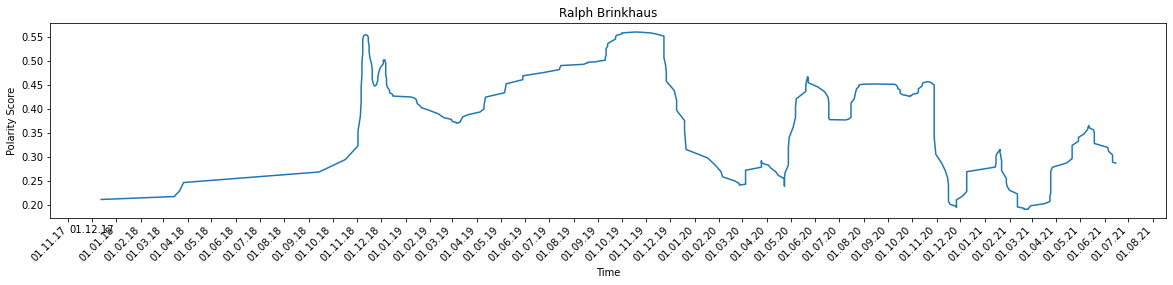

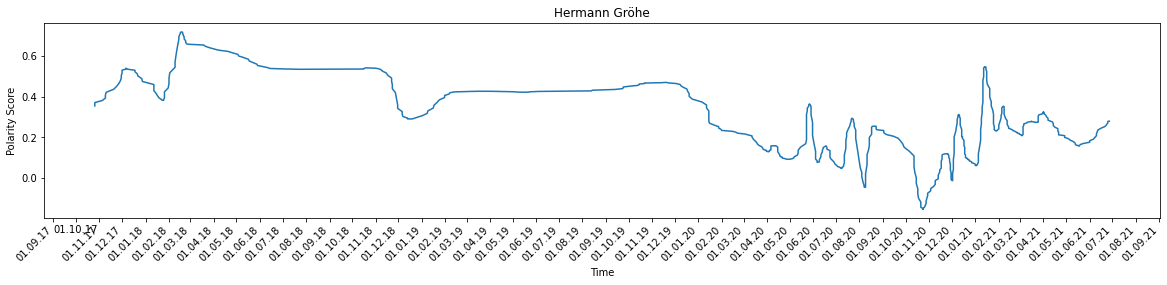

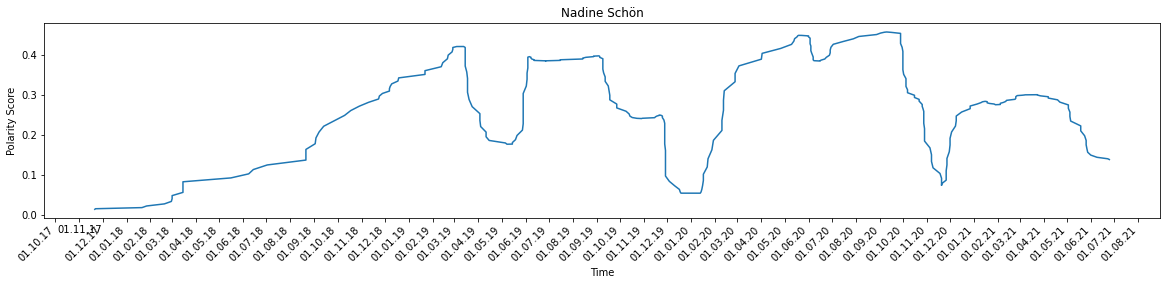

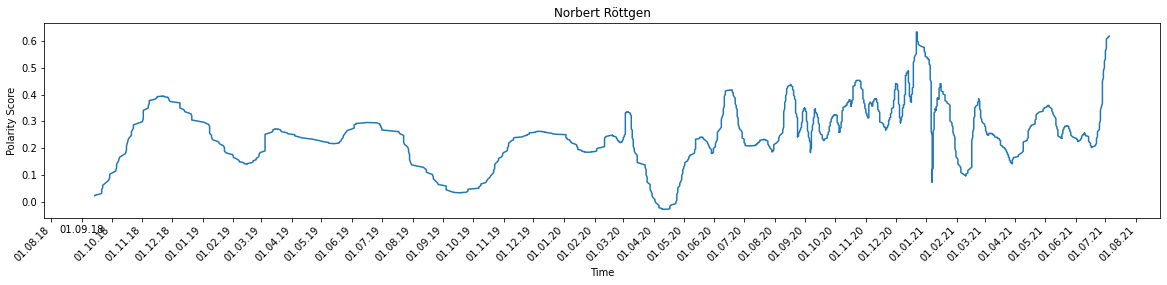

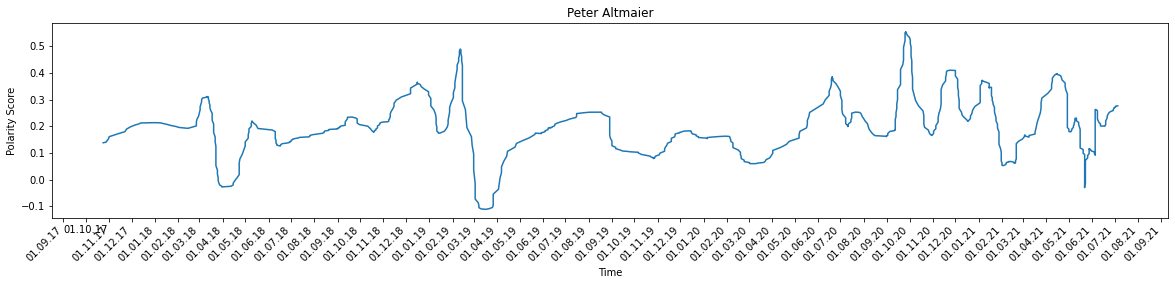

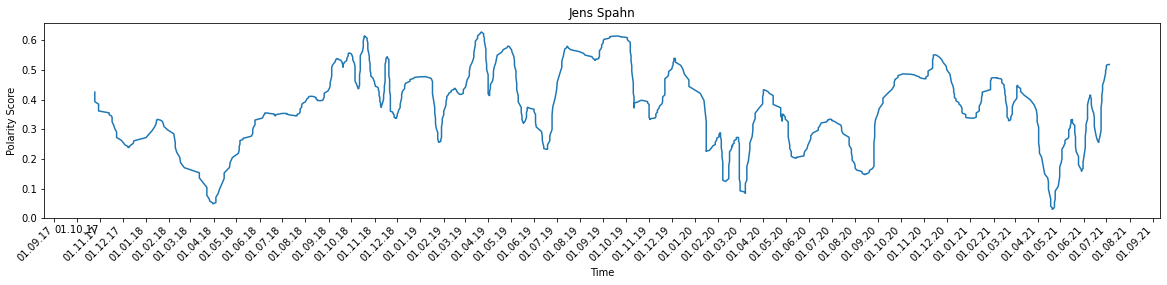

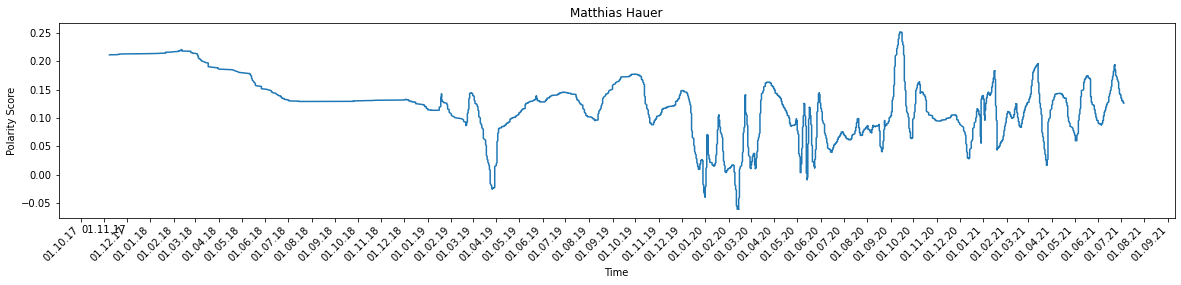

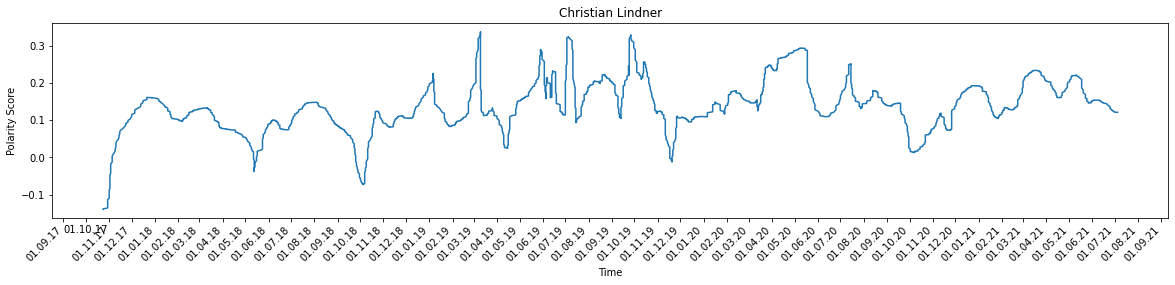

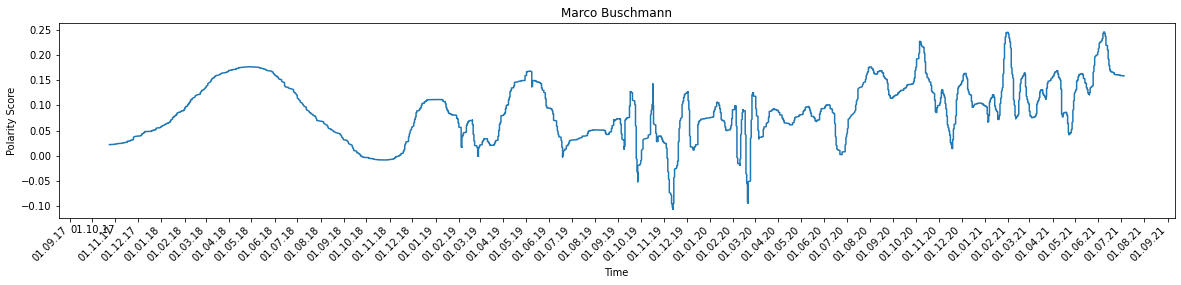

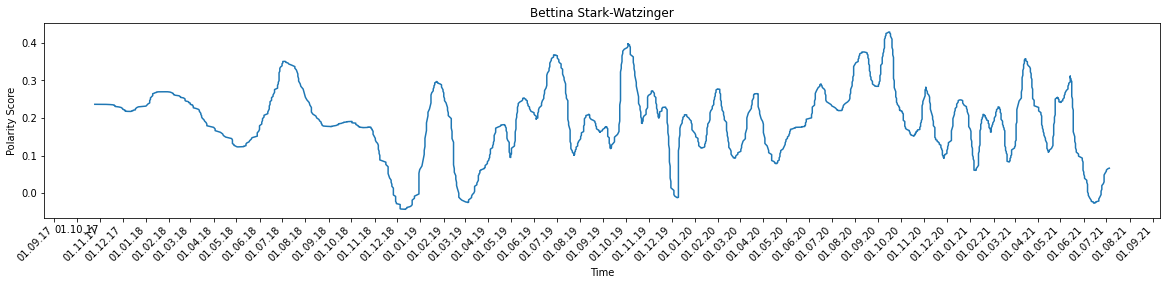

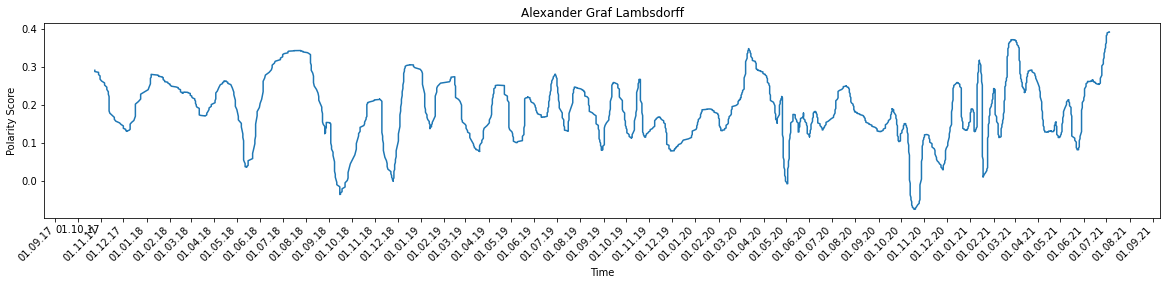

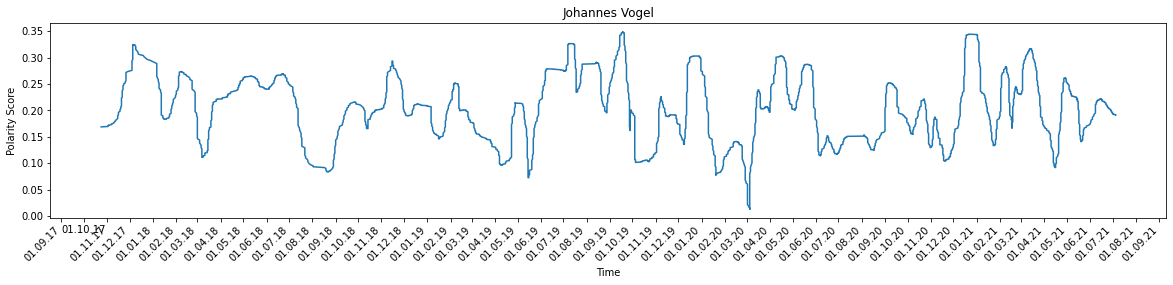

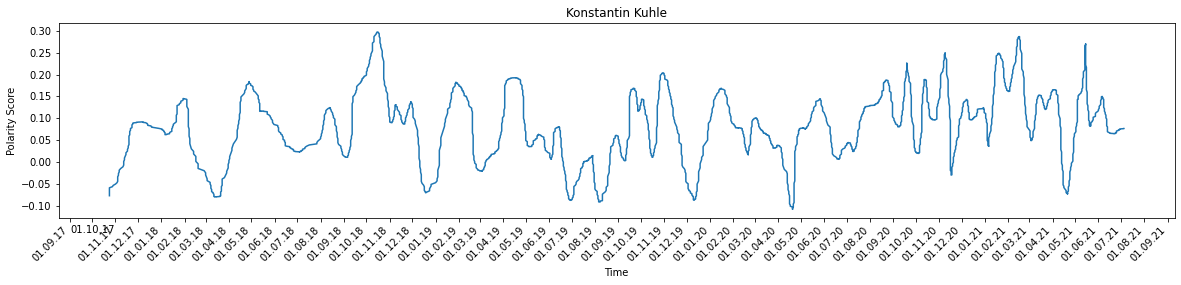

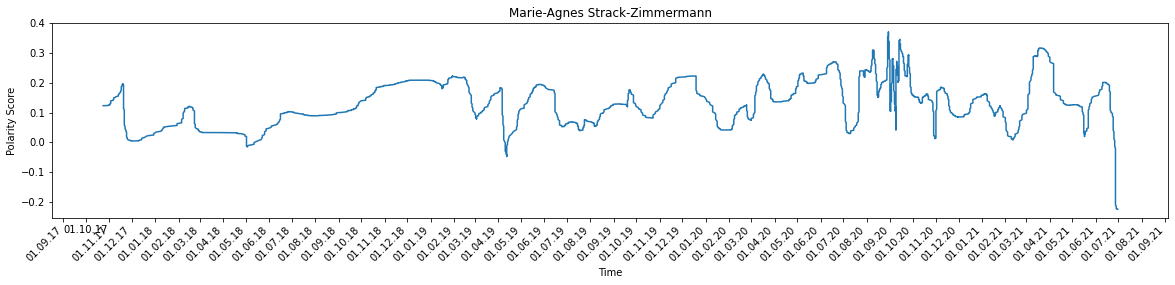

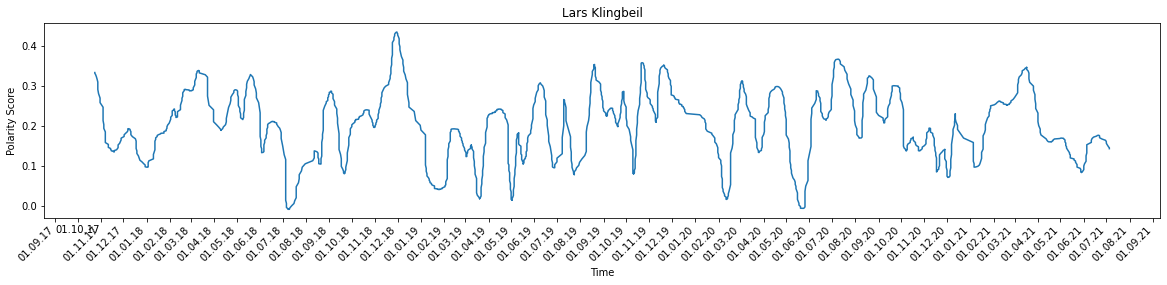

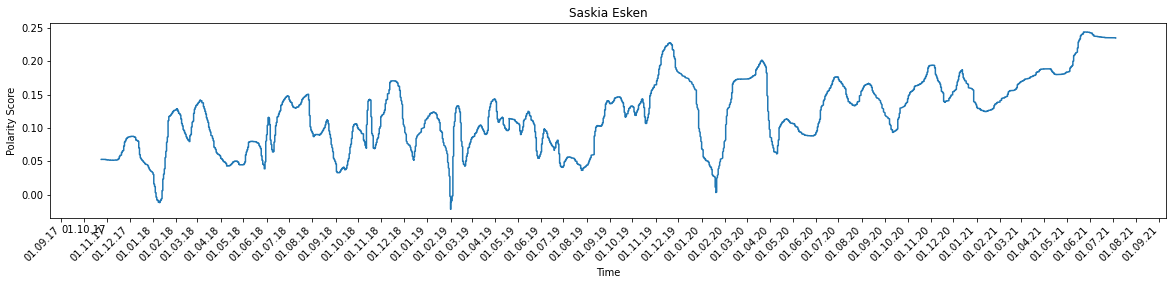

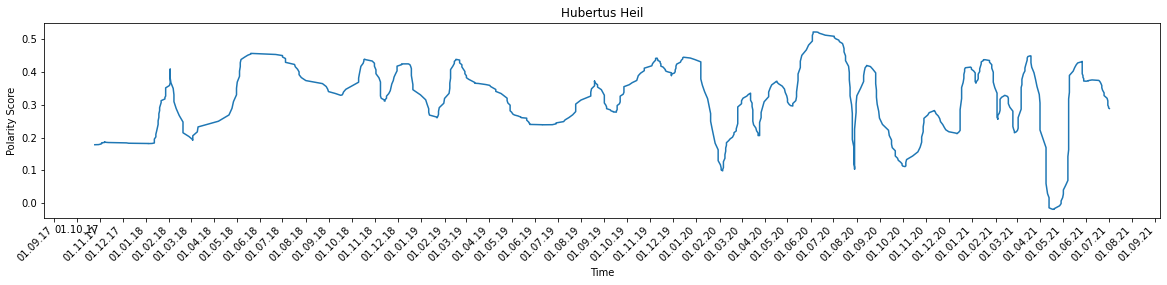

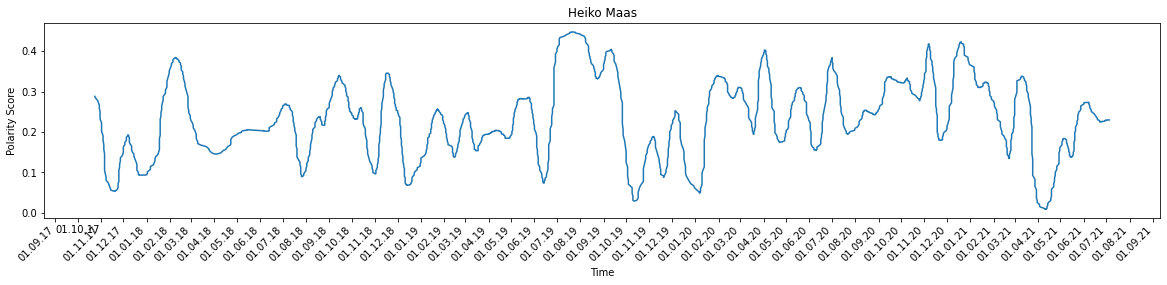

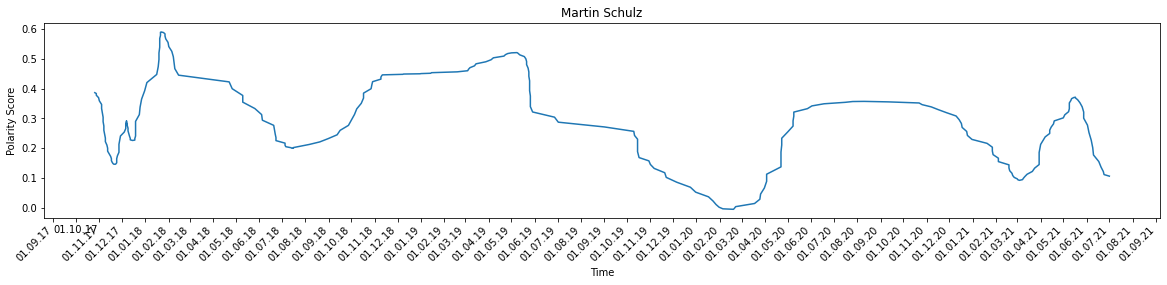

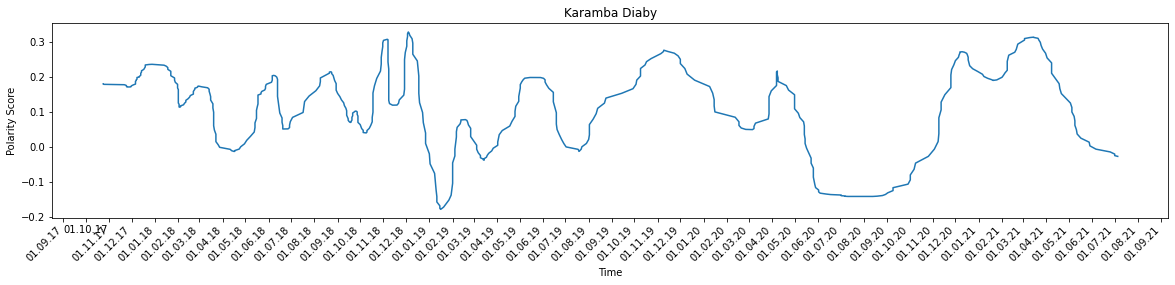

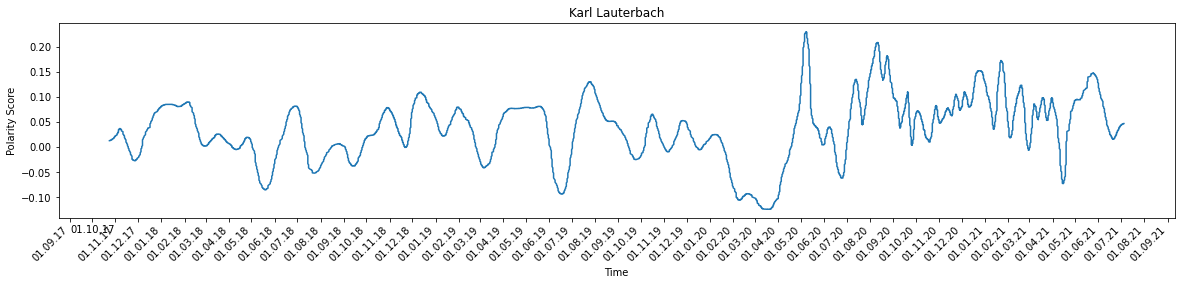

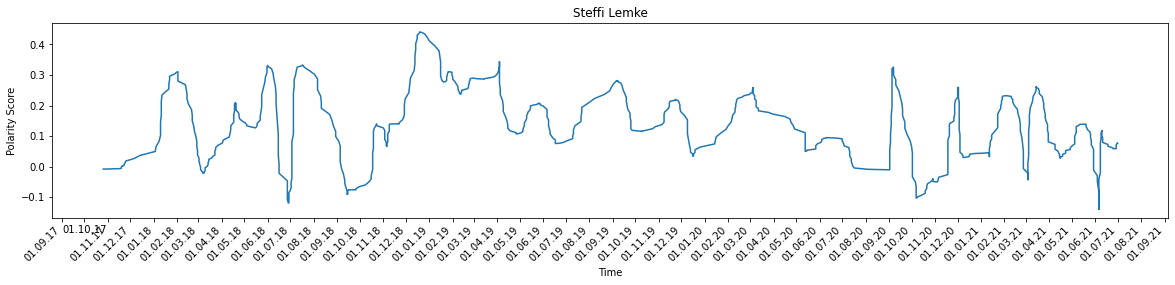

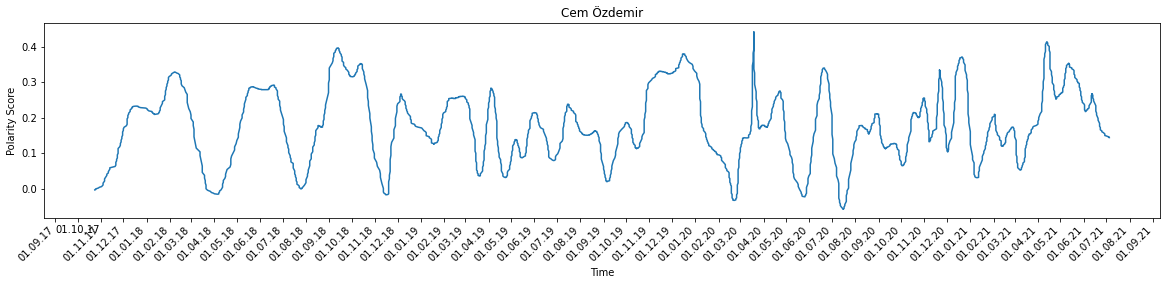

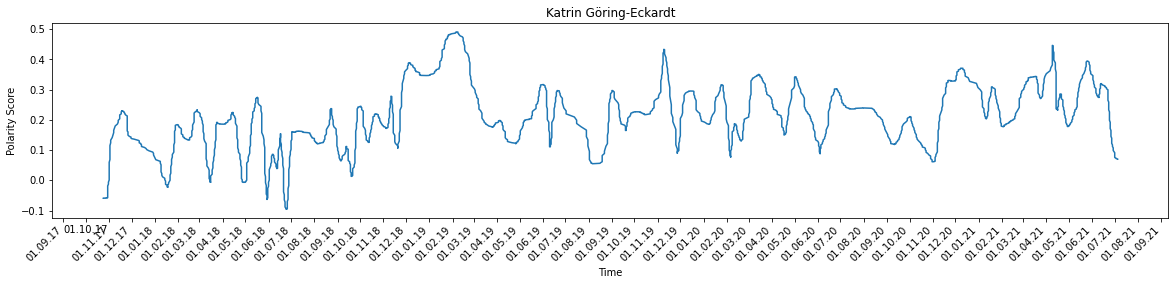

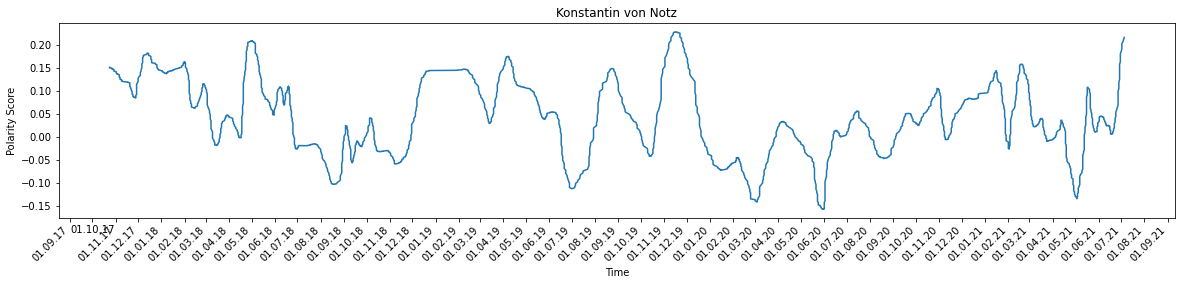

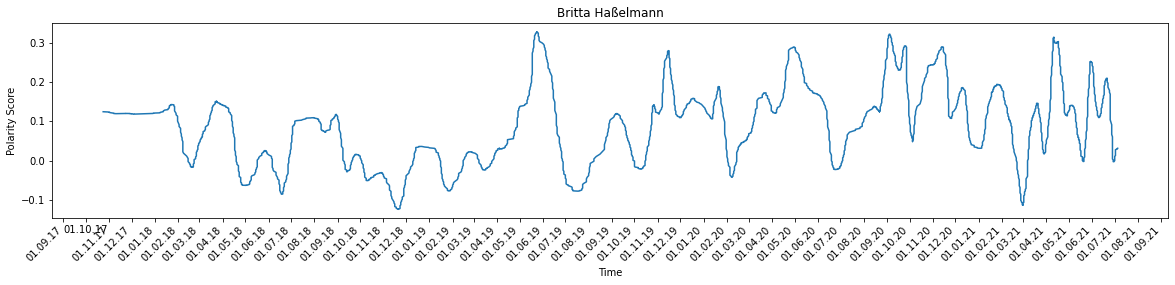

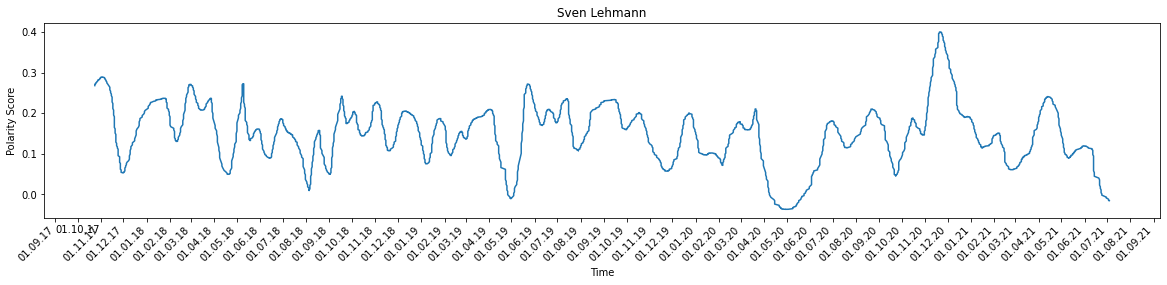

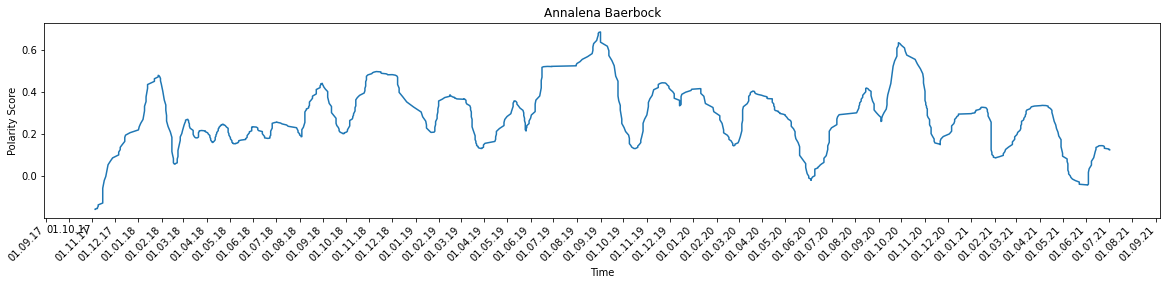

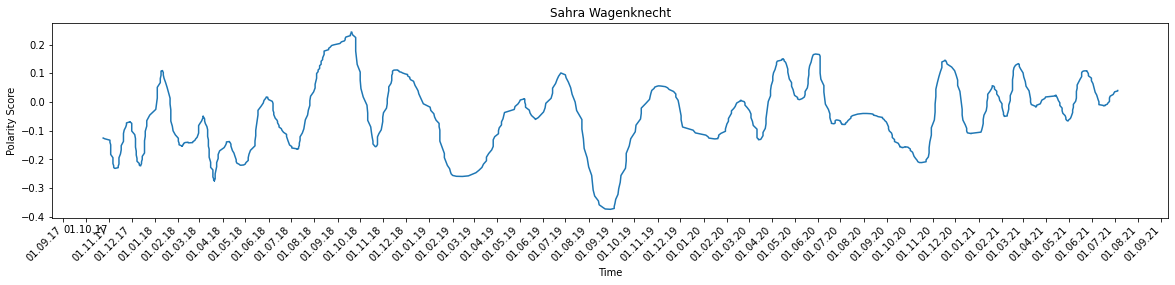

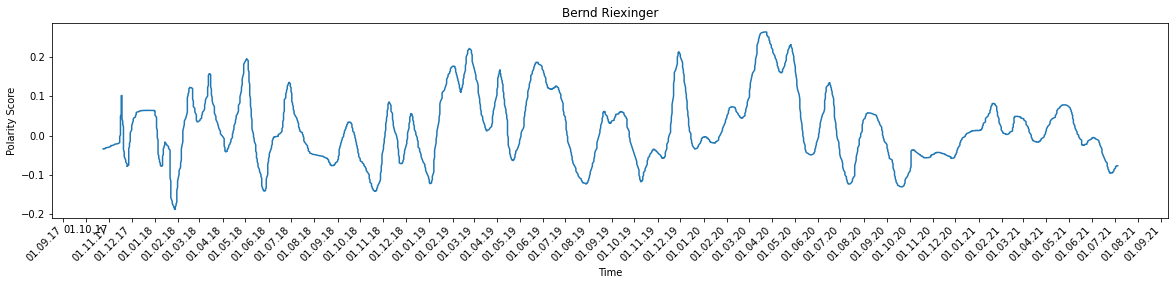

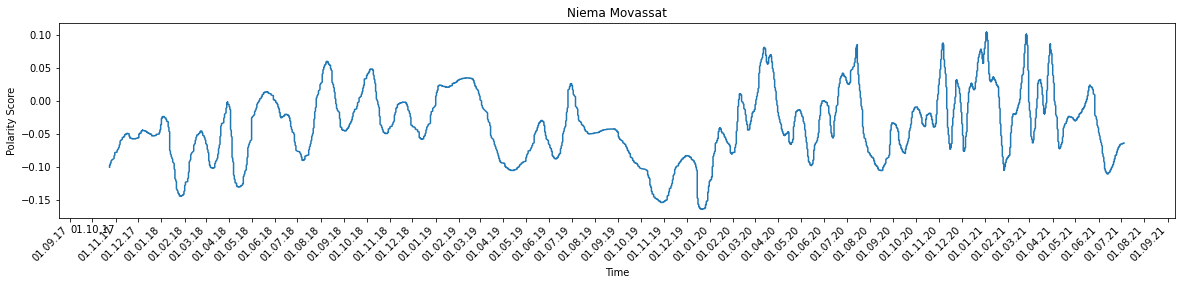

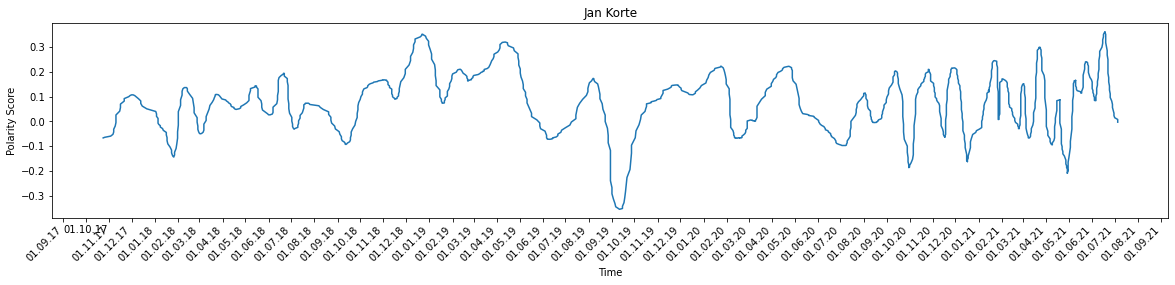

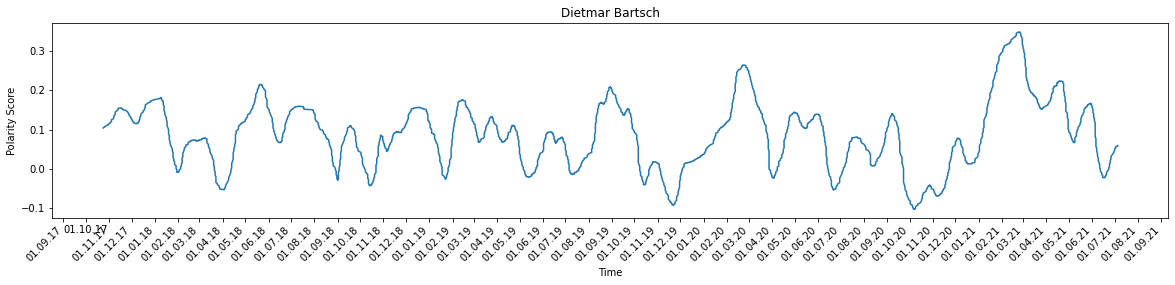

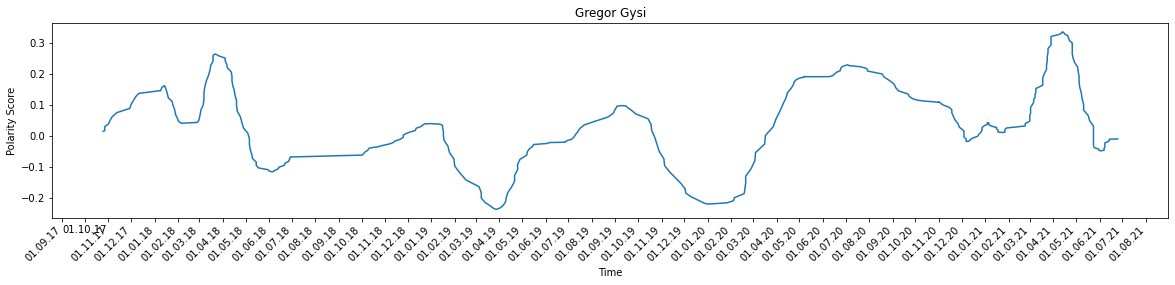

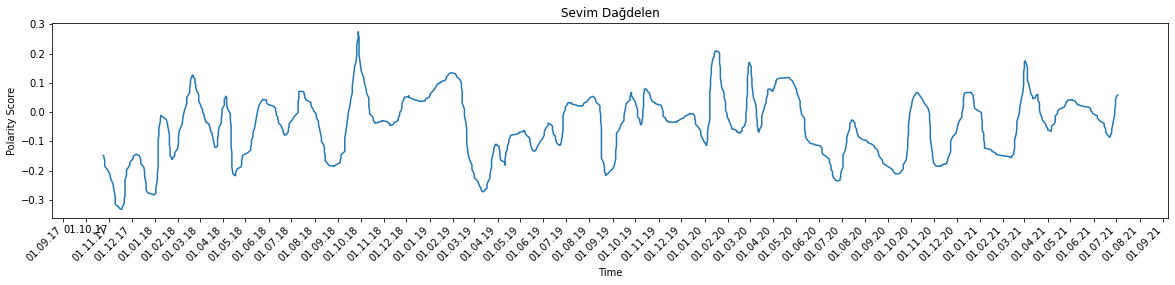

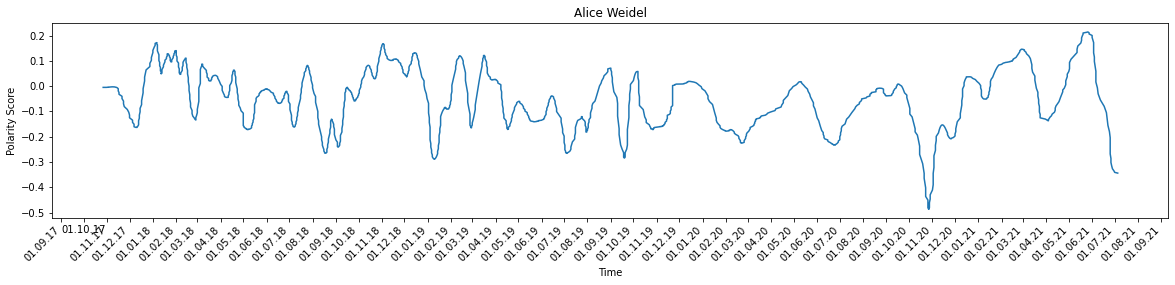

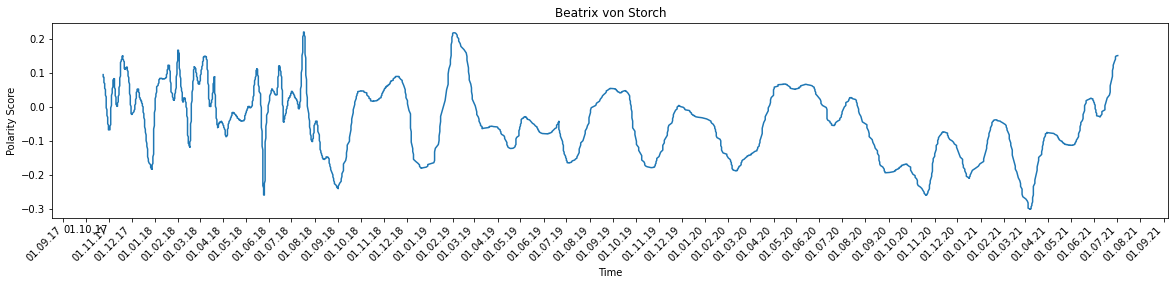

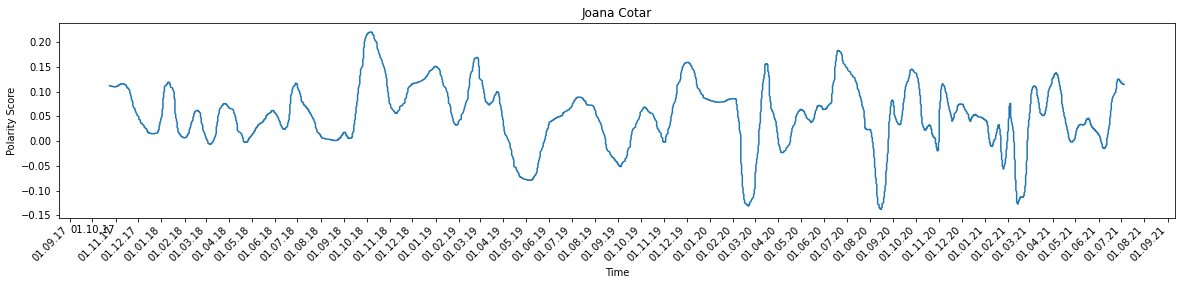

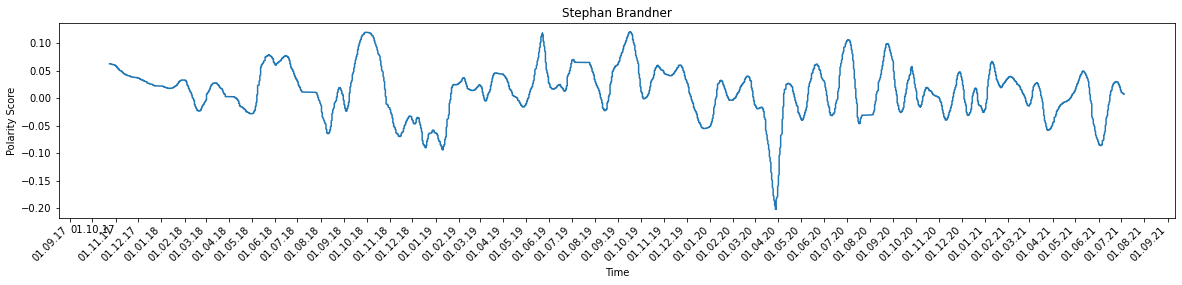

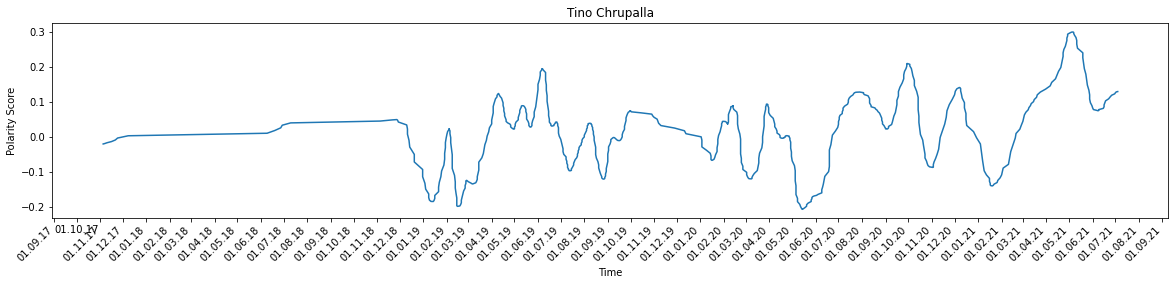

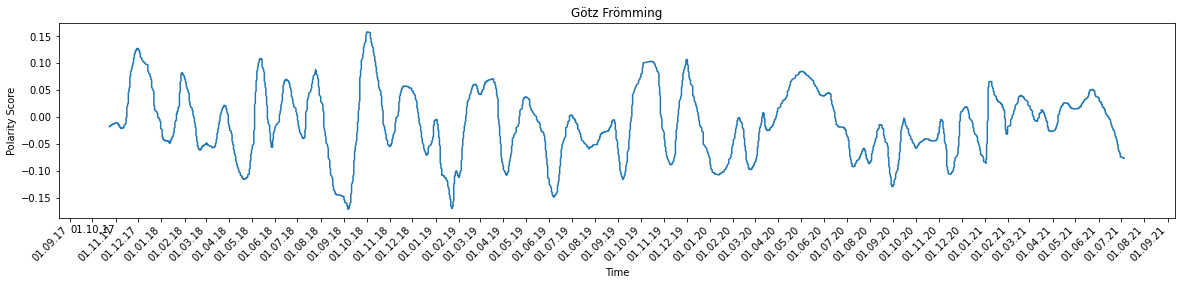

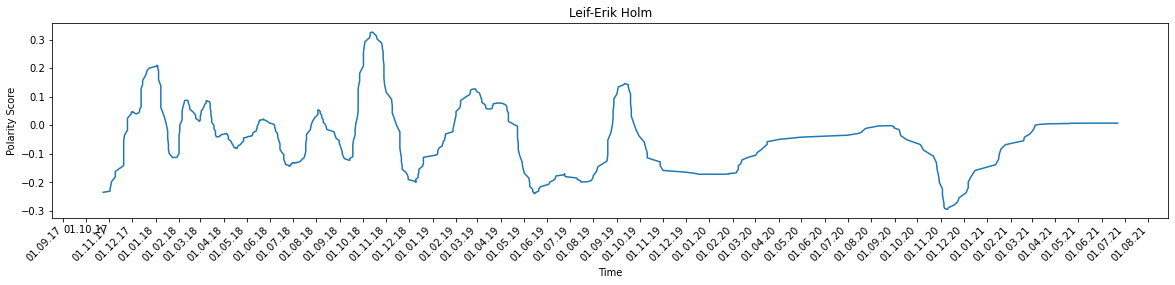

In [6]:
#plot the polarity of tweets over time
i=1
for name in tqdm(['Ralph Brinkhaus','Hermann Gröhe', 'Nadine Schön' ,'Norbert Röttgen' , 'Peter Altmaier' , 'Jens Spahn' , 'Matthias Hauer',
            'Christian Lindner' , 'Marco Buschmann' , 'Bettina Stark-Watzinger', 'Alexander Graf Lambsdorff' , 'Johannes Vogel' , 'Konstantin Kuhle' , 'Marie-Agnes Strack-Zimmermann',
            'Lars Klingbeil' , 'Saskia Esken' , 'Hubertus Heil' , 'Heiko Maas' , 'Martin Schulz' , 'Karamba Diaby' , 'Karl Lauterbach',
            'Steffi Lemke' , 'Cem Özdemir' , 'Katrin Göring-Eckardt' , 'Konstantin von Notz' , 'Britta Haßelmann' , 'Sven Lehmann' , 'Annalena Baerbock',
            'Sahra Wagenknecht' , 'Bernd Riexinger' , 'Niema Movassat' , 'Jan Korte' , 'Dietmar Bartsch' , 'Gregor Gysi' , 'Sevim Dağdelen',
            'Alice Weidel' , 'Beatrix von Storch' , 'Joana Cotar' , 'Stephan Brandner' , 'Tino Chrupalla' , 'Götz Frömming' , 'Leif-Erik Holm']):
    #get tweets from the specific politician
    tweets_analyzing =pre_data_twitter.loc[pre_data_twitter['full_name']==name]
    #create sentiment scores
    blobs=tweets_analyzing['text_preprocessed_sentence'].apply(TextBlob)
    sentiment=[]
    for blob in blobs:
        sentiment.append(blob.sentiment)
    #get the scores
    polarity=[]
    for egg in sentiment:
        polarity.append(egg.polarity)
    #get the desired dates and convert timestamp
    tweets_analyzing['polarity']=polarity
    tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])

    dates=tweets_analyzing['date']
    values=tweets_analyzing['polarity']

    #smooth the curve, higher sigma means more smoothing
    if len(polarity)>18999:
        s=100
    elif len(polarity)>17999:
        s=95
    elif len(polarity)>16999:
        s=90
    elif len(polarity)>15999:
        s=85
    elif len(polarity)>14999:
        s=80
    elif len(polarity)>13999:
        s=75
    elif len(polarity)>12999:
        s=70
    elif len(polarity)>11999:
        s=65
    elif len(polarity)>10999:
        s=60
    elif len(polarity)>9999:
        s=55
    elif len(polarity)>8999:
        s=50
    elif len(polarity)>7999:
        s=45
    elif len(polarity)>6999:
        s=40
    elif len(polarity)>5999:
        s=35
    elif len(polarity)>4999:
        s=30
    elif len(polarity)>3999:
        s=25
    elif len(polarity)>2999:
        s=20
    elif len(polarity)>1999:
        s=15
    elif len(polarity)>1399:
        s=10
    else:
        s=8
    ysmoothed = gaussian_filter1d(values, sigma=s)

    fig = plt.figure(figsize=(20,200))
    ax = fig.add_subplot(42,1,i)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))    
    fig.autofmt_xdate(rotation=45)
    plt.title(name)
    plt.xlabel('Time')
    plt.ylabel('Polarity Score')
    plt.plot(dates, ysmoothed)
    plt.show()
    i +=1

### 4.2.2 Results for Bundestag Speeches

As next step we will take a look at the Bundestag speeches of the politicians selected to see if we see similar trends and results as for their tweets or if the sentiment will be different on this platform. We again first import our preprocessed corpus for the speeches.

In [15]:
#import data
sentiment_speeches=pd.read_csv("../data/processed/sentiment_scores_speeches_01.csv")
pre_data_speeches= pickle.load(open('../data/processed/speeches_processed.p','rb'))

#### 4.2.2.1 Analysis of Political Parties

Starting of with the analysis of the sentiment based on the party of the considered politicians, we look at the mean of the polarity score for all the parties. In addition, we again compute the sum of all positive, negative, and neutral tweets. <br>
For the polarity means we have overall higher values which suggest a more positive sentiment. Again we see that CDU and SPD have the most positive sentiment scores which we also observed with the tweets. In this regard the only difference is that the SPD has the highest polarity score. So it seems that the SPD has more critical views in their tweets than their Bundestag speeches. This could be caused because the SPD was also part of the governement so they were part of most decisions made in the Bundestag. In contrast on social media they could than post more critical views that maybe were to controversial for a governing party in the Bundestag. <br>
For the other parties of the political middle they again have a positive sentiments that is a little lower than the one from CDU and SPD. While for Die Linke we again get a similar score as before that is noticeably lower than the one of FDP and Die Grünen the score for the AFD is surprisingly high and only a little lower than the other scores. <br>
When looking at the total number we may see a reason for this new trend. Because all parties have a rather similar amount of positively labeled speeches with the exeption of Die Linke and because for all of them the amounts of negative and neutral speeches are noticeably lower we see why we have that shift upwards. Still Die Linke and AFD have the most negative speeches. This may be due to the complex text character of speeches making it harder to determine their sentiment. Another reason for this shift could also lie in the formal format the politicians need to have in their speeches in comparison to their social media posts. This style of text may include more positive assigned words or the texts have more complex latent meanings in which the negative perspectives are hidden. <br>
Also in comparison to the tweets we have less neutral assignments for the sentiment. This could also be explained with the style of text used in speeches in the Bundestag. Another aspect that may as well be involved here is text length. With longer text there is a higher chance to encounter sentiment deciding words from the dictionary. We can assume that in general tweets are shorter than speeches especially due to the restricted length given by Twitter. So this may also be a factor coming into play here that needs to be considered especially when thinking about the validity of the approach.

In [12]:
#compute the mean for Polarity and sum over number of speeches from the six parties represented
CDU_polarity = np.mean(sentiment_speeches['Polarity_mean'][0:7])
print('CDU Sentiment: ',CDU_polarity)
FDP_polarity = np.mean(sentiment_speeches['Polarity_mean'][7:14])
print('FDP Sentiment: ',FDP_polarity)
SPD_polarity = np.mean(sentiment_speeches['Polarity_mean'][14:21])
print('SPD Sentiment: ',SPD_polarity)
GRUENE_polarity = np.mean(sentiment_speeches['Polarity_mean'][21:28])
print('GRUENE Sentiment: ',GRUENE_polarity)
LINKE_polarity = np.mean(sentiment_speeches['Polarity_mean'][28:35])
print('LINKE Sentiment: ',LINKE_polarity)
AFD_polarity = np.mean(sentiment_speeches['Polarity_mean'][35:42])
print('AFD Sentiment: ',AFD_polarity)
print( )

for category in ['Num_pos_speeches','Num_neutral_speeches','Num_neg_speeches']:
    CDU_cat = np.sum(sentiment_speeches[category][0:7])
    print('CDU ',category,': ',CDU_cat)
    FDP_cat = np.sum(sentiment_speeches[category][7:14])
    print('FDP ',category,': ',FDP_cat)
    SPD_cat = np.sum(sentiment_speeches[category][14:21])
    print('SPD ',category,': ',SPD_cat)
    GRUENE_cat = np.sum(sentiment_speeches[category][21:28])
    print('GRUENE ',category,': ',GRUENE_cat)
    LINKE_cat = np.sum(sentiment_speeches[category][28:35])
    print('LINKE ',category,': ',LINKE_cat)
    AFD_cat = np.sum(sentiment_speeches[category][35:42])
    print('AFD ',category,': ',AFD_cat)
    print( )

CDU Sentiment:  0.32609146585596893
FDP Sentiment:  0.2894172233378474
SPD Sentiment:  0.35604357231474093
GRUENE Sentiment:  0.2671830444581131
LINKE Sentiment:  0.05000582844898308
AFD Sentiment:  0.16752867587538792

CDU  Num_pos_speeches :  437
FDP  Num_pos_speeches :  392
SPD  Num_pos_speeches :  443
GRUENE  Num_pos_speeches :  312
LINKE  Num_pos_speeches :  142
AFD  Num_pos_speeches :  307

CDU  Num_neutral_speeches :  80
FDP  Num_neutral_speeches :  47
SPD  Num_neutral_speeches :  74
GRUENE  Num_neutral_speeches :  53
LINKE  Num_neutral_speeches :  37
AFD  Num_neutral_speeches :  70

CDU  Num_neg_speeches :  57
FDP  Num_neg_speeches :  76
SPD  Num_neg_speeches :  62
GRUENE  Num_neg_speeches :  91
LINKE  Num_neg_speeches :  120
AFD  Num_neg_speeches :  138



#### 4.2.2.2 Analysis of Gender Differences

When looking at the gender data we see a similar picture as with the tweets. The overall female polarity score seems a little lower than the male one but again the population of female politicians in our data is smaller and therefore not as representative. Again we can assume that the gender factor will not play a big role in sentiment which we will now look deeper into with the further analysis.

In [13]:
#compute the mean for Polarity and sum over number of speeches for male and female politicians
female_polarity= np.mean(sentiment_speeches.loc[sentiment_speeches['Name'].isin(['Nadine Schön' ,'Bettina Stark-Watzinger','Marie-Agnes Strack-Zimmermann','Saskia Esken' ,'SteffiLemke' ,'Katrin Göring-Eckardt' ,'Britta Haßelmann' ,'Annalena Baerbock (Archiv)','Sahra Wagenknecht' ,'Sevim Dağdelen, MdB','Alice Weidel' ,'Beatrix von Storch'])]['Polarity_mean'])
print('Female Sentiment:',female_polarity)
for category in ['Num_pos_speeches','Num_neutral_speeches','Num_neg_speeches']:
    female_cat = np.sum(sentiment_speeches.loc[sentiment_speeches['Name'].isin(['Nadine Schön' ,'Bettina Stark-Watzinger','Marie-Agnes Strack-Zimmermann','Saskia Esken' ,'SteffiLemke' ,'Katrin Göring-Eckardt' ,'Britta Haßelmann' ,'Annalena Baerbock (Archiv)','Sahra Wagenknecht' ,'Sevim Dağdelen, MdB','Alice Weidel' ,'Beatrix von Storch'])][category])
    print('Female ',category,': ',female_cat)

male_polarity= np.mean(sentiment_speeches.loc[~sentiment_speeches['Name'].isin(['Nadine Schön' ,'Bettina Stark-Watzinger','Marie-Agnes Strack-Zimmermann','Saskia Esken' ,'SteffiLemke' ,'Katrin Göring-Eckardt' ,'Britta Haßelmann' ,'Annalena Baerbock (Archiv)','Sahra Wagenknecht' ,'Sevim Dağdelen, MdB','Alice Weidel' ,'Beatrix von Storch'])]['Polarity_mean'])
print('Male Sentiment:',male_polarity)
for category in ['Num_pos_speeches','Num_neutral_speeches','Num_neg_speeches']:
    male_cat = np.sum(sentiment_speeches.loc[~sentiment_speeches['Name'].isin(['Nadine Schön' ,'Bettina Stark-Watzinger','Marie-Agnes Strack-Zimmermann','Saskia Esken' ,'SteffiLemke' ,'Katrin Göring-Eckardt' ,'Britta Haßelmann' ,'Annalena Baerbock (Archiv)','Sahra Wagenknecht' ,'Sevim Dağdelen, MdB','Alice Weidel' ,'Beatrix von Storch'])][category])
    print('Male ',category,': ',male_cat)

Female Sentiment: 0.21797838378315448
Female  Num_pos_speeches :  345
Female  Num_neutral_speeches :  67
Female  Num_neg_speeches :  117
Male Sentiment: 0.24945706721178482
Male  Num_pos_speeches :  1688
Male  Num_neutral_speeches :  294
Male  Num_neg_speeches :  427


#### 4.2.2.3 Analysis of Politicians over Time

As a last step in our analysis we again plot the graphs of the individual politicians polarity for the speeches over time as we did with the tweets. We are again left with the 42 grpahs for the politicians which we are going to analyze as above for one politician per party. To keep the structure we are going to take the same politicians as before.

Because there are fewer speeches and there tend to be a lot of speeches in small time intervals, this time around the graphs seem to have points with very steep rises and falls but also big intervals with almost not movement. This can be seen as an indicator that the analysis over time is more complex. A reason for this behavior could be the unregular distances in time between speeches and the fact that most of the times speeches are followed up by the same person. Therefore, these extreme graphs may not be to surprising but certainly worse for analysis. 

First we can see a similar overall picture for Jens Spahn as with the tweets. The noticeable differences are in the lower minimums of his polarity scores with short drops even into negative polarity. What may be surprising is that it is also harder to see the impact of current topic like Corona which was surprisingly easy within the tweet sentiment. When we look at the deepest drop in April of 2019 we can try to explain it with the fact that around that time the government has made a new law proposal which was questioned through a survey in the Bundestag. These questions were addressed at Jens Spahn because he was the minister of health and in charge of the proposal. As he has to answer multiple questions this can influence the sentiment in various ways. 

For Christian Lindner we can also see a overall more positive sentiment. In difference to Spahn he has no extreme spikes in his polarity scores which may suggests that he did not conduct a survey in the Bundestag and had no questioning. Apart from that there are no significant looking time interval other than with his tweets. What surprises is that his overall trend changes in the speeches. Where as it was positive for his tweet sentiment now for his speech sentiment it is negative. It is difficult to see a clear explenation for this. One could speculate if the positive sentiment on Twitter is mostly attributed to the marketing for his party and initiatives which he obviously won't mentione in the Bundestag.

In the case of Karl Lauterbach we also see a very different picture in comparison to his tweet sentiments. Especially from early 2019 on his sentiment is continous on a very high level. This could on the one side be because he had fewer speeches from that point on in the Bundestag or one the other side because the topics he addressed were more positively conotated. In any case this graph looks very different to the one for the tweets where his sentiment was changing a lot through that period of time. This seems to be a somewhat good example of a politician that has a very different appearence through speech on social media and in the Bundestag only judging by the sentiment. 

For Annalena Baerbock we can also see a more positive trend in sentiment over time here. For her we can see a very steep drop end of October 2019. In this case, around that time she had a draft for a law against child abuse which could be linked to the drop in sentiment. From that we can see once more that the topics discussed in their speeches can have a heavy impact on their overall sentiment and these steep drops seem to be an indicator for controversial and critical topics.

When looking at Sahra Wagenknechts speech sentiment over time see that there is no big movement which lets us believe that she has had only a small amount of speeches. Like the other Die Linke politicians she also has a rather low level of polarity which could show that they are similarly critical in the comments to the political decisions in the Bundestag as on social media.

Lasty, Alice Weidel shows only few fluctuations in comparison to her Twitter sentiments which could lead to a similar conclusions as with Wagenknecht. Overall the AFD seems to have some topics and periods with very high polarity which result in very psoitive sentiment overall. A possible explenation could be the conservative character of the last government. Another explenation could also lie in the fact that it was their first period in the Bundestag and they had the chance to make some proposals which they conotated positive.

  0%|          | 0/42 [00:00<?, ?it/s]

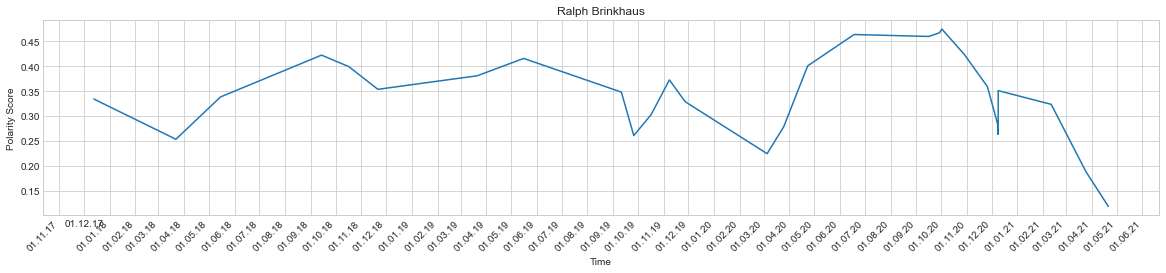

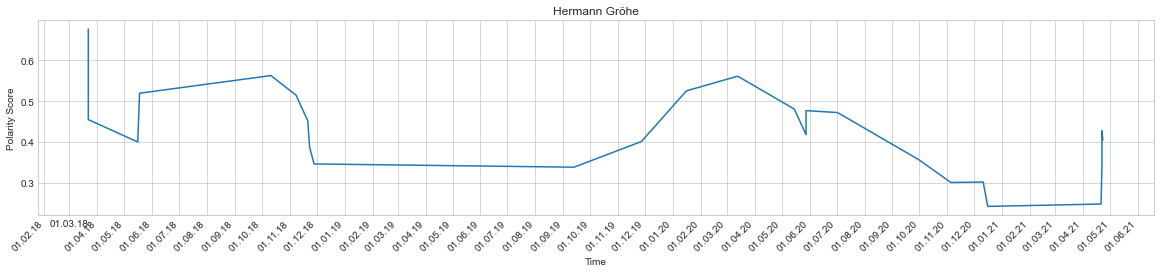

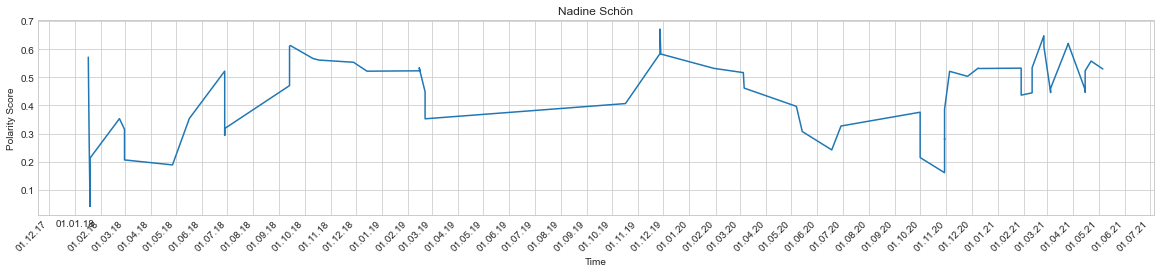

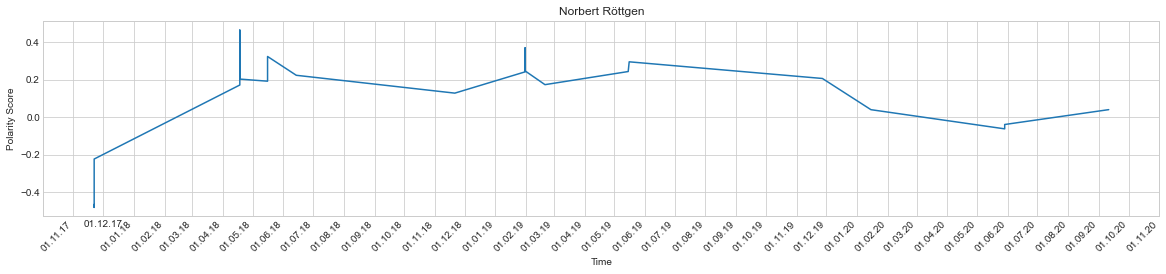

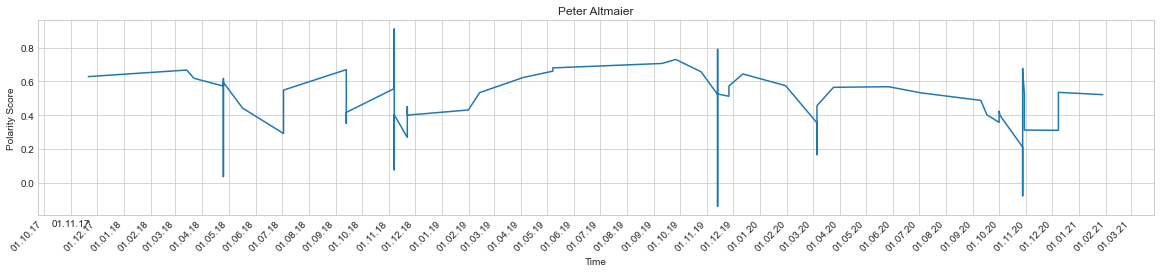

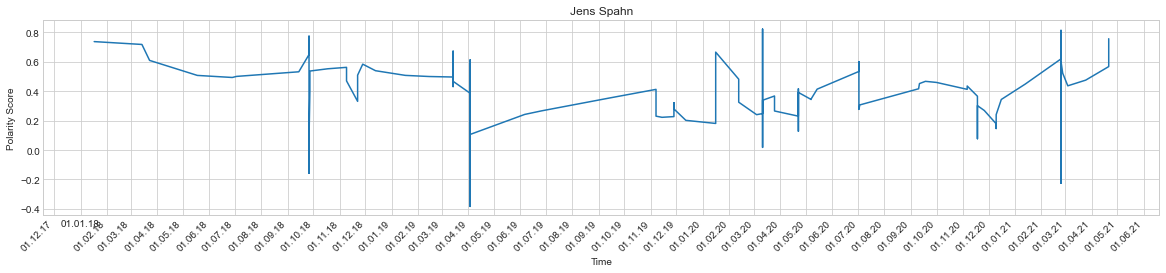

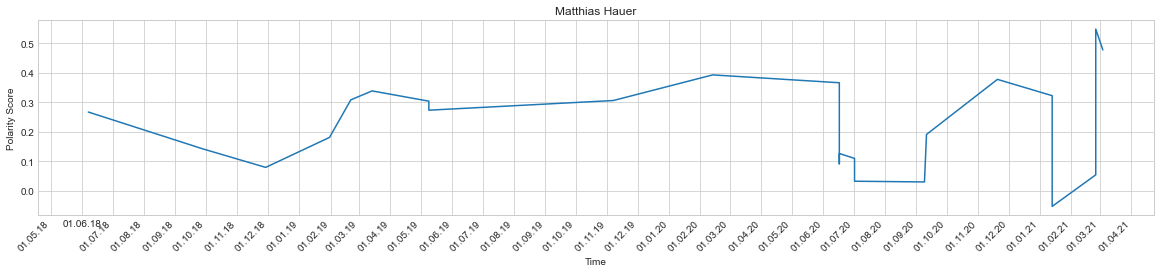

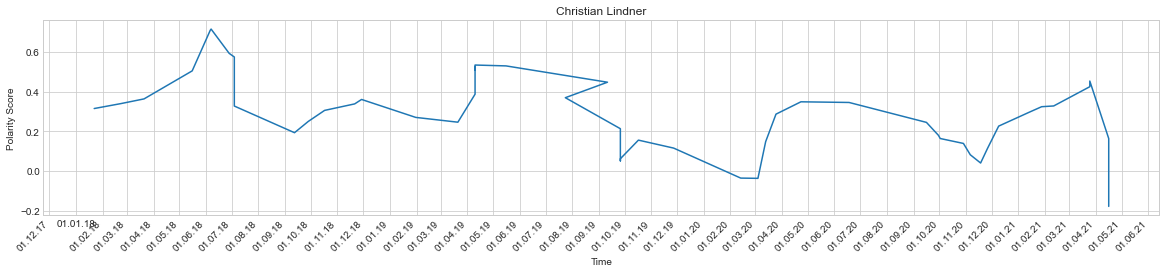

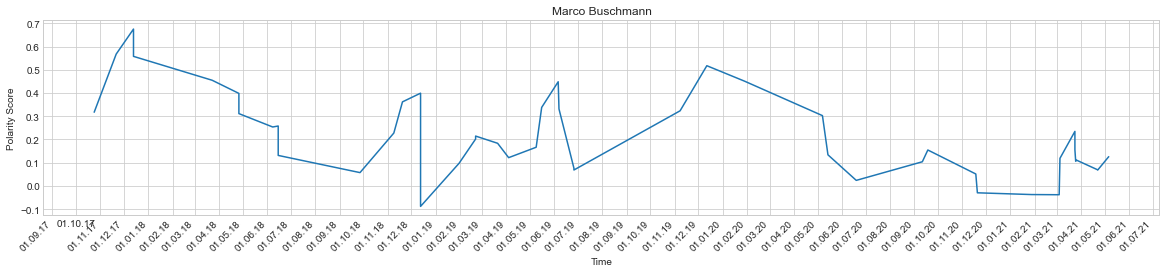

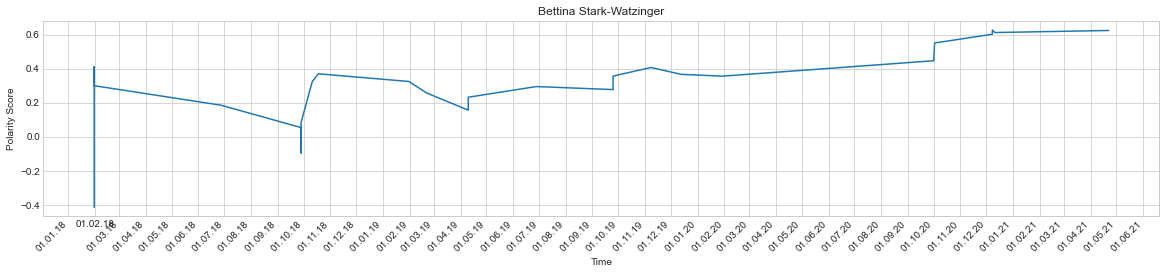

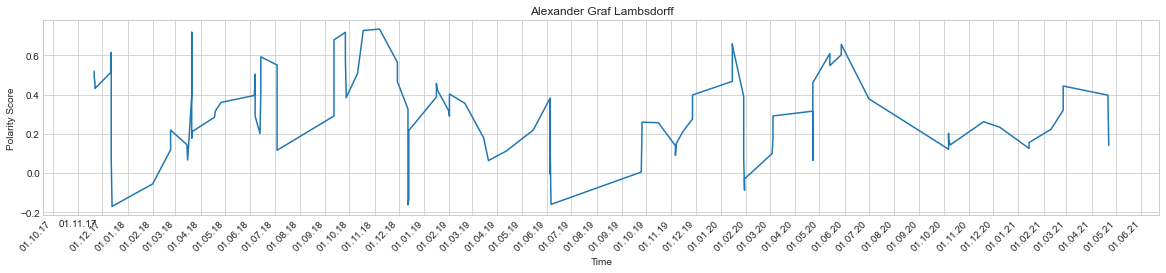

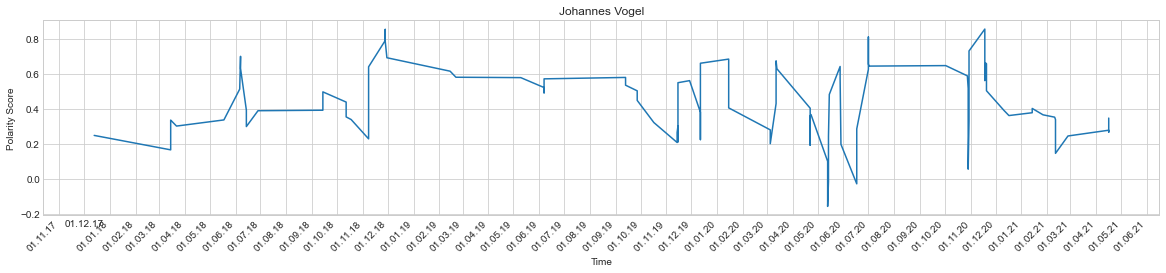

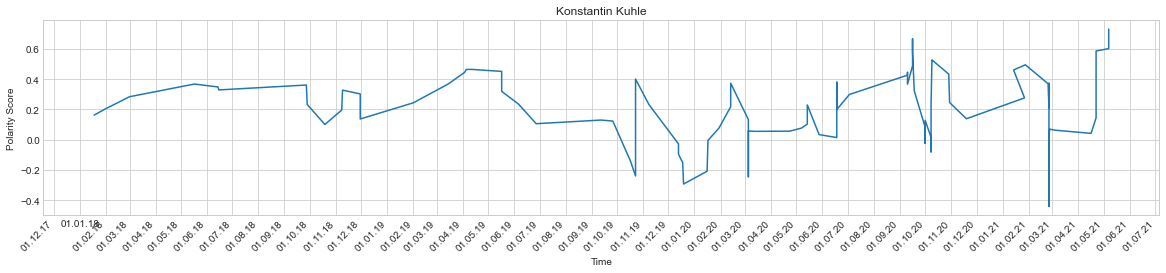

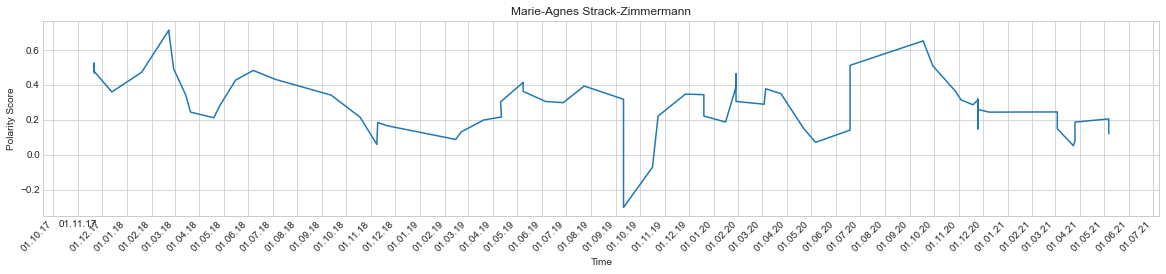

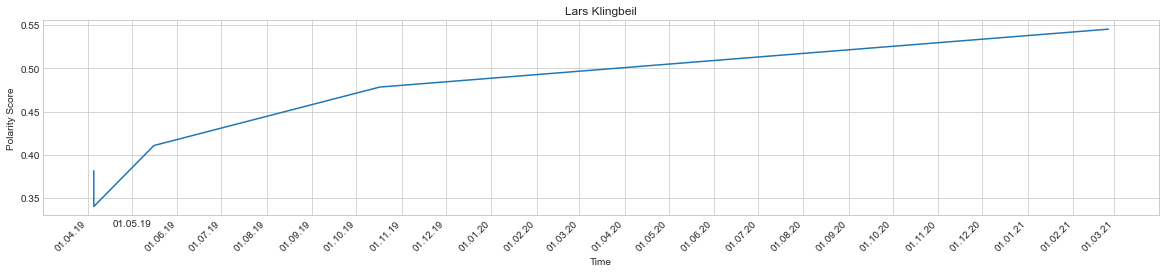

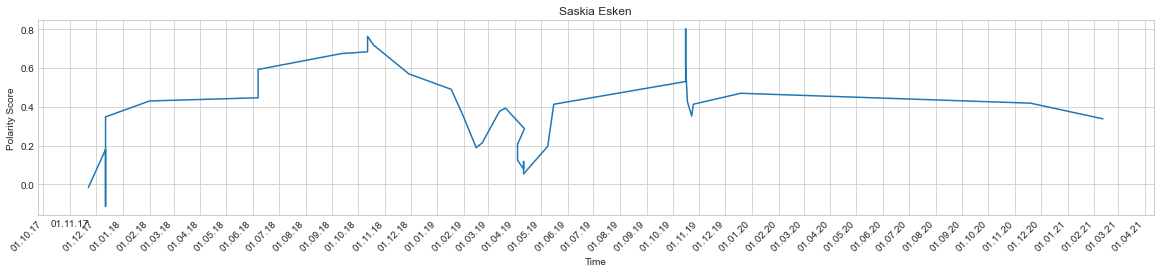

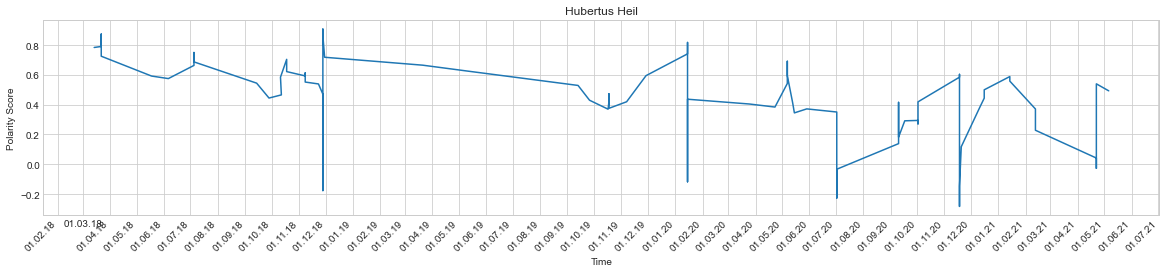

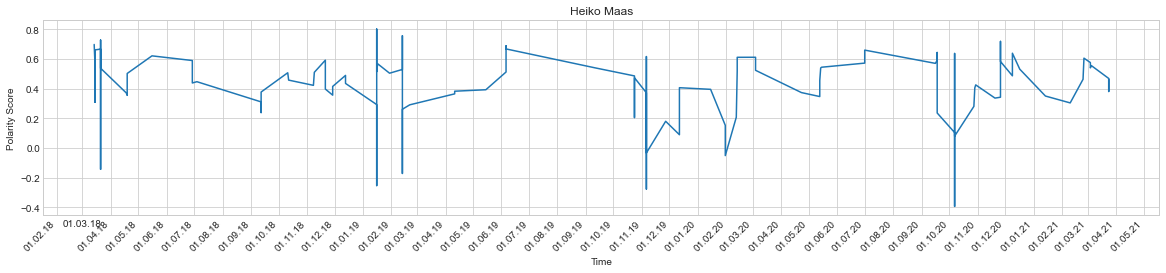

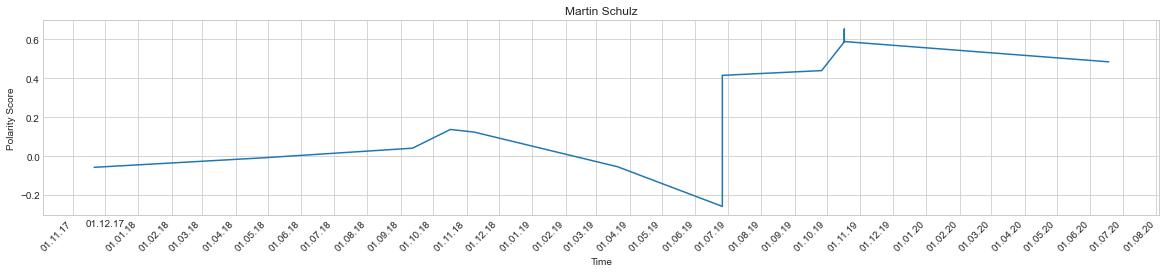

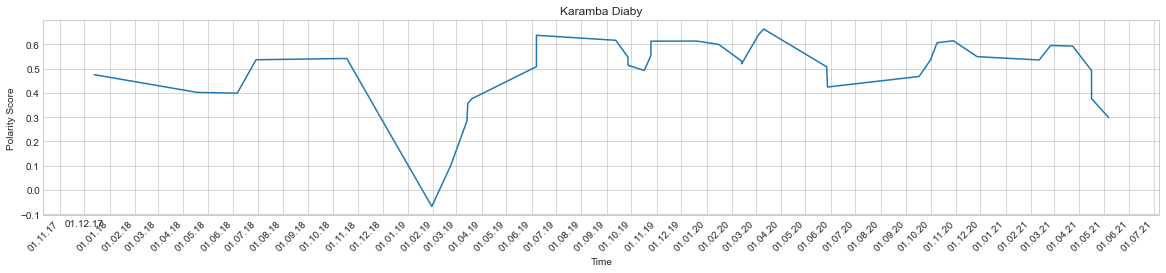

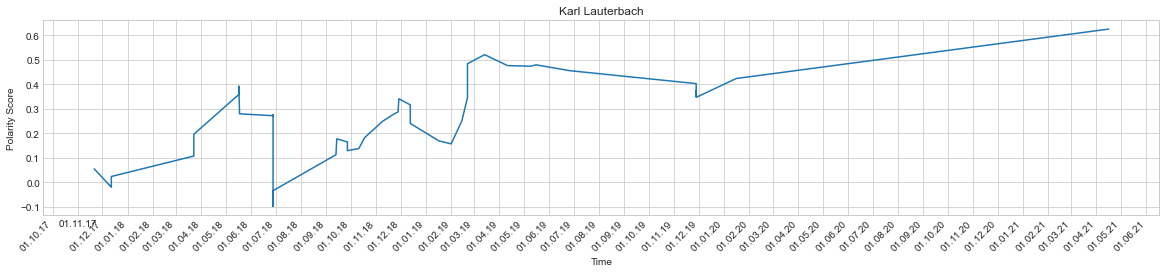

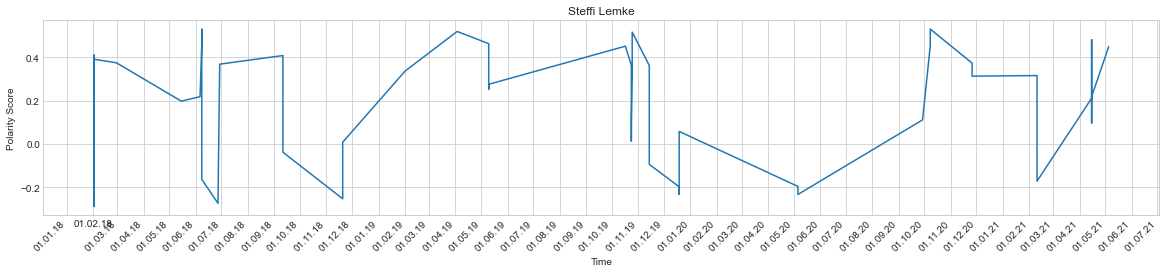

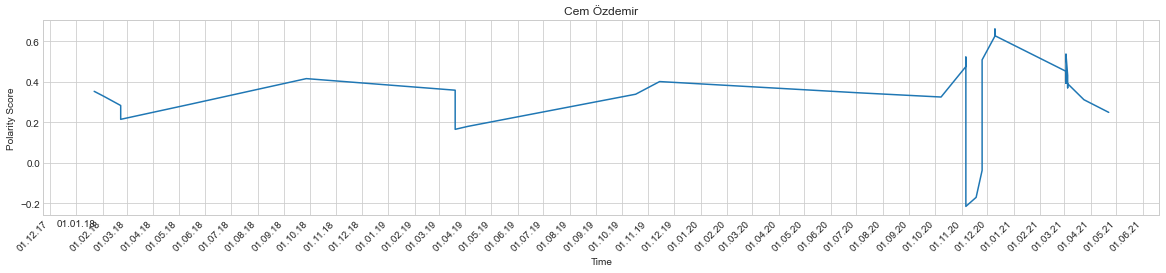

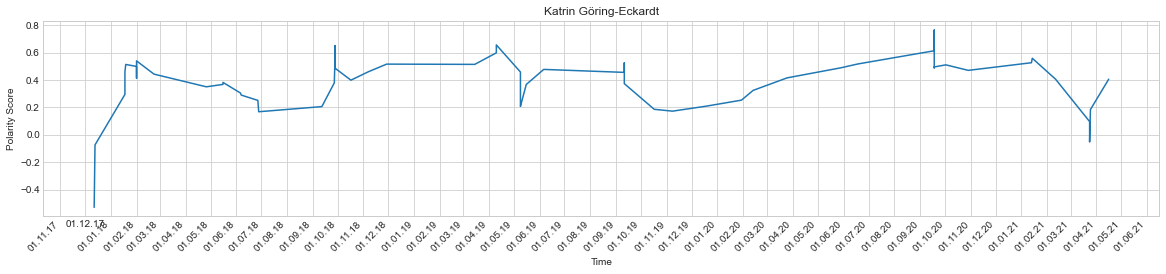

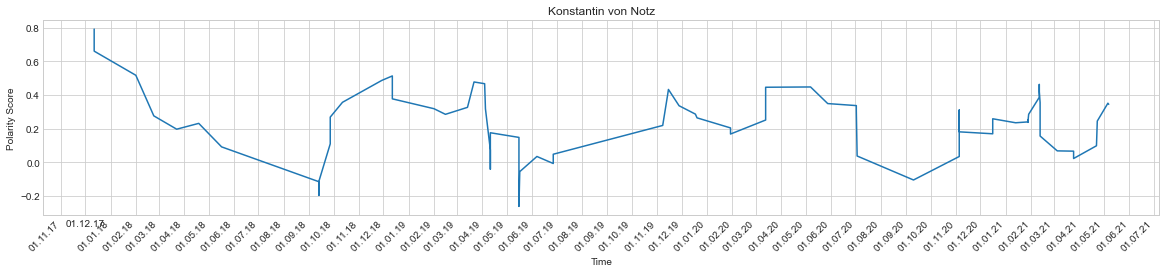

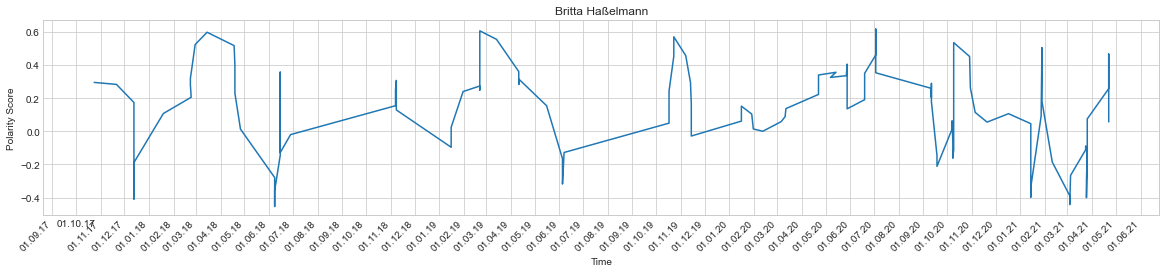

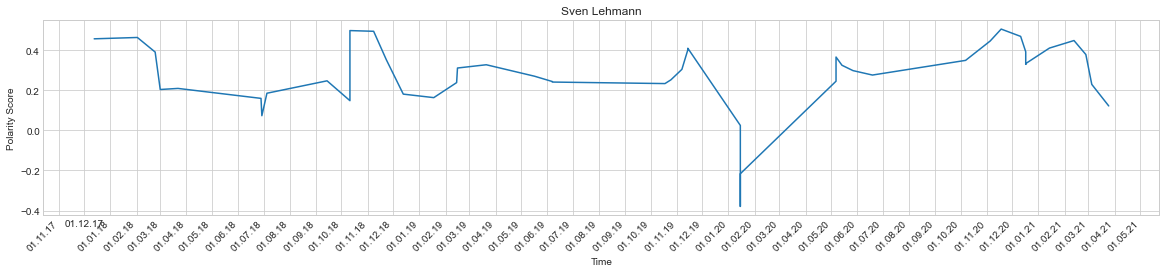

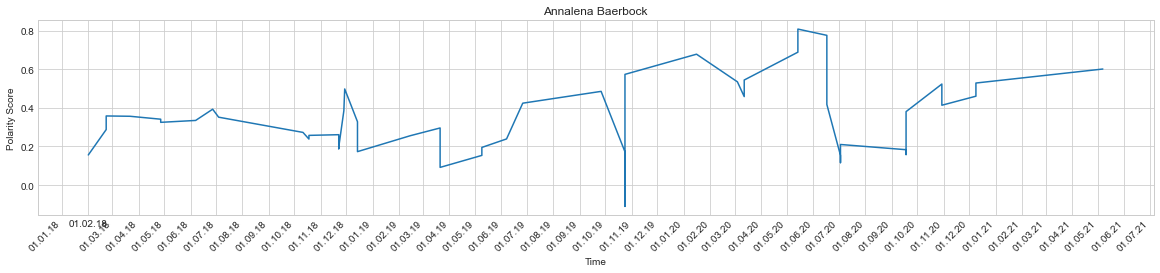

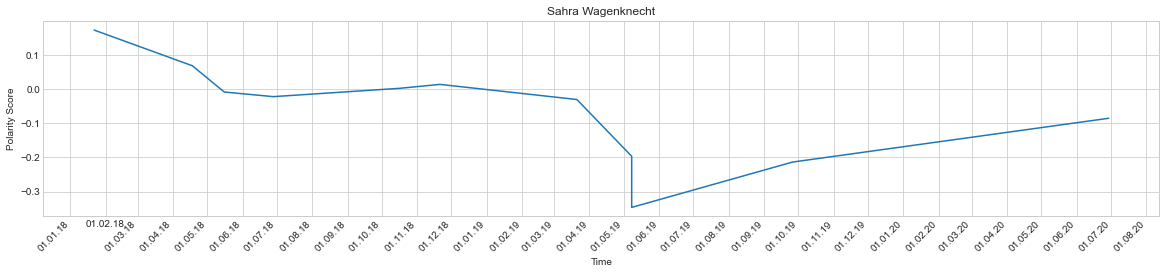

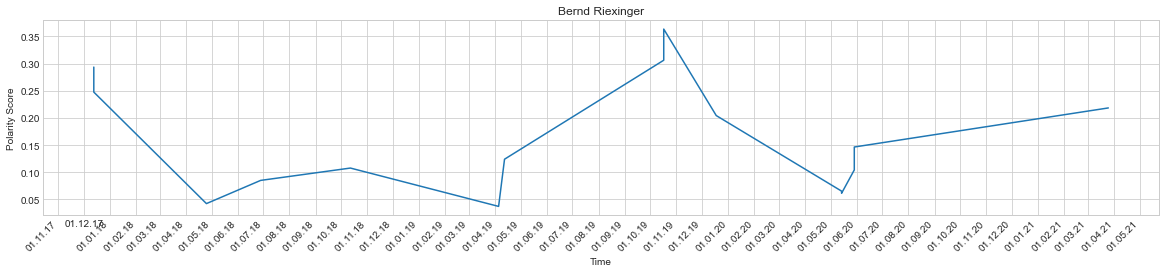

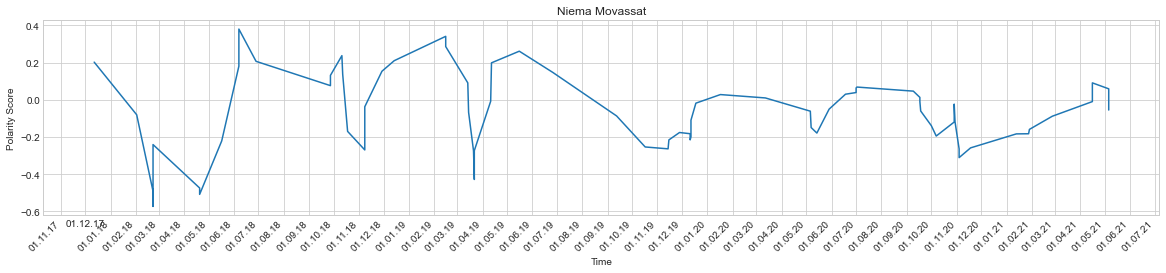

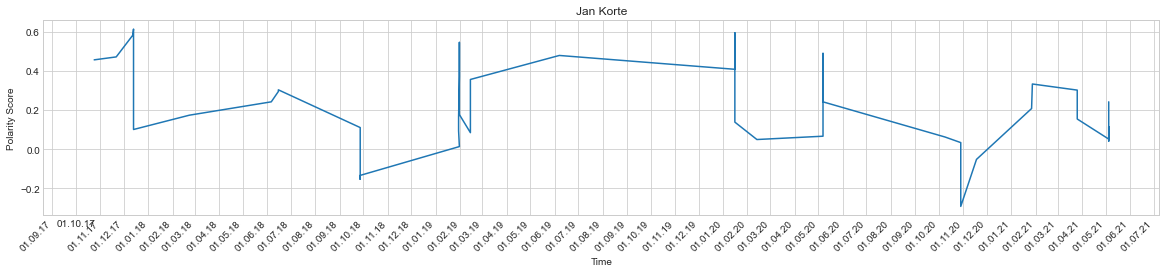

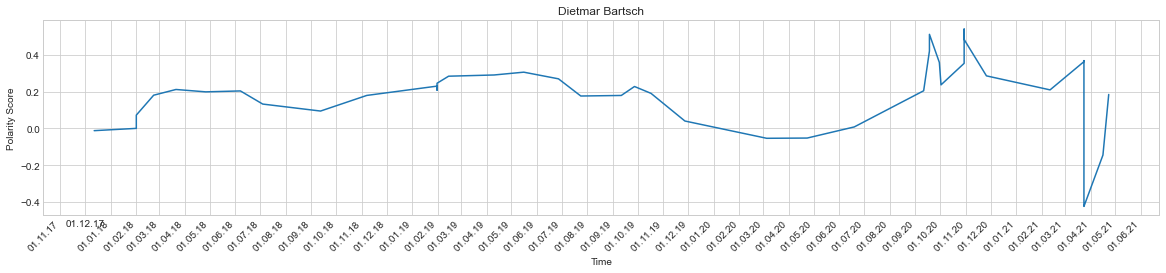

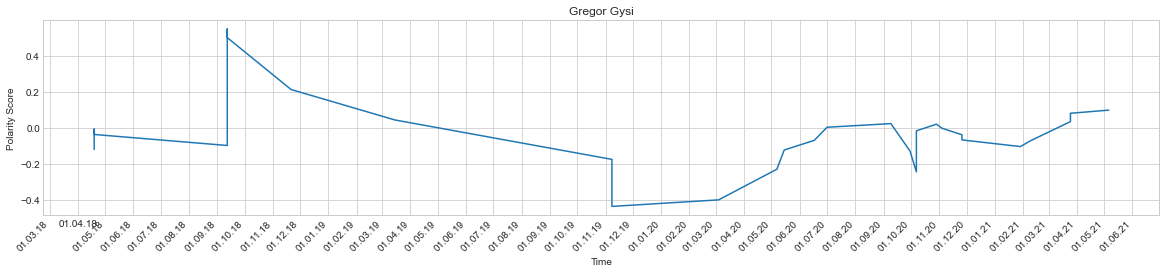

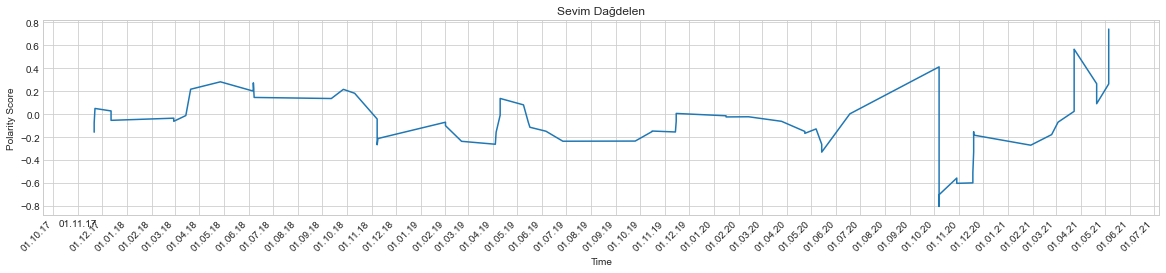

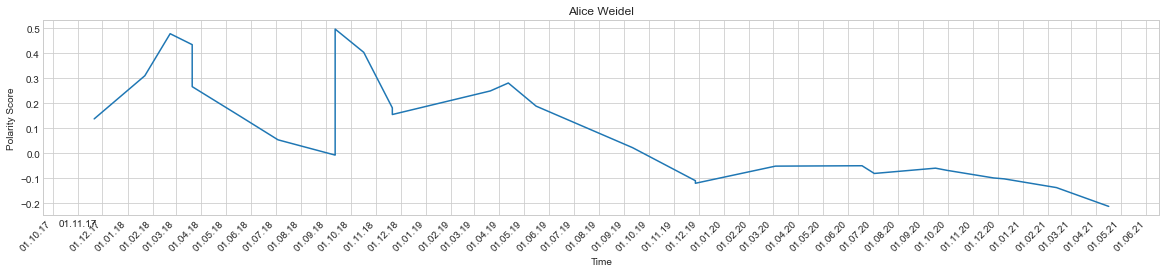

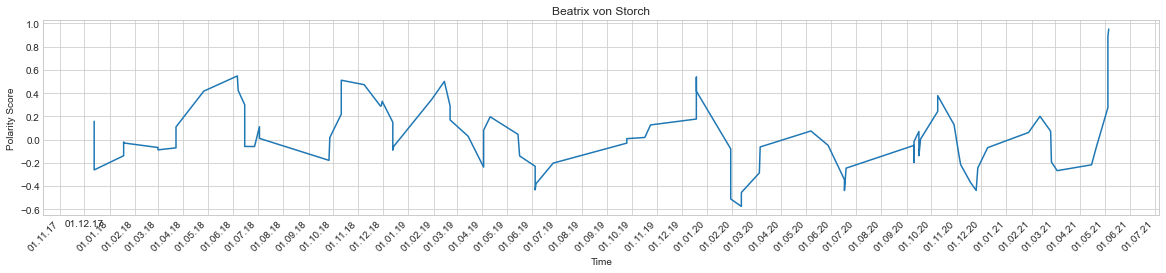

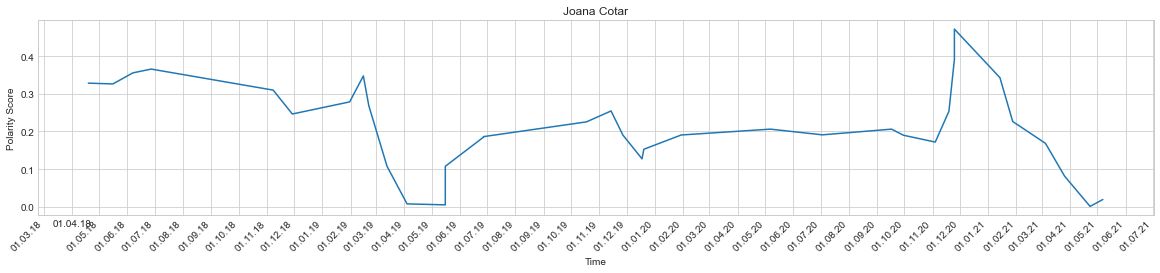

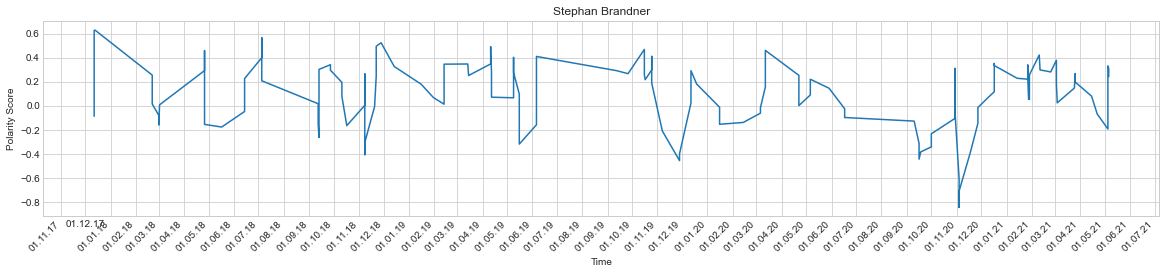

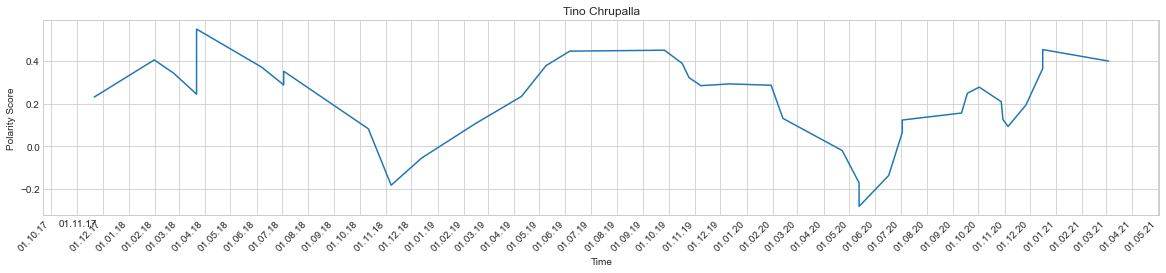

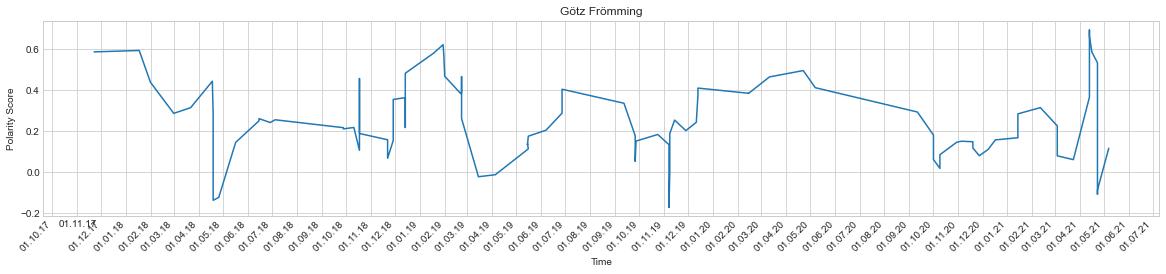

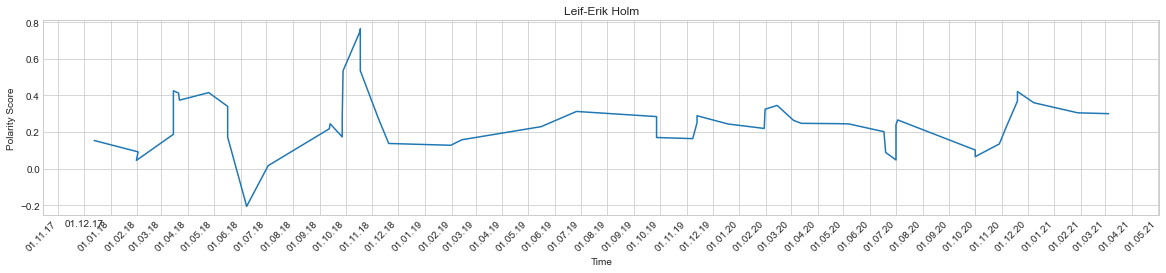

In [16]:
#plot the polarity of speeches over time
i=1
for name in tqdm(['Ralph Brinkhaus','Hermann Gröhe', 'Nadine Schön' ,'Norbert Röttgen' , 'Peter Altmaier' , 'Jens Spahn' , 'Matthias Hauer',
            'Christian Lindner' , 'Marco Buschmann' , 'Bettina Stark-Watzinger', 'Alexander Graf Lambsdorff' , 'Johannes Vogel' , 'Konstantin Kuhle' , 'Marie-Agnes Strack-Zimmermann',
            'Lars Klingbeil' , 'Saskia Esken' , 'Hubertus Heil' , 'Heiko Maas' , 'Martin Schulz' , 'Karamba Diaby' , 'Karl Lauterbach',
            'Steffi Lemke' , 'Cem Özdemir' , 'Katrin Göring-Eckardt' , 'Konstantin von Notz' , 'Britta Haßelmann' , 'Sven Lehmann' , 'Annalena Baerbock',
            'Sahra Wagenknecht' , 'Bernd Riexinger' , 'Niema Movassat' , 'Jan Korte' , 'Dietmar Bartsch' , 'Gregor Gysi' , 'Sevim Dağdelen',
            'Alice Weidel' , 'Beatrix von Storch' , 'Joana Cotar' , 'Stephan Brandner' , 'Tino Chrupalla' , 'Götz Frömming' , 'Leif-Erik Holm']):
    #get speeches from the specific politician
    speeches_analyzing =pre_data_speeches.loc[pre_data_speeches['full_name']==name]
    #create sentiment scores
    blobs=speeches_analyzing['text_preprocessed_sentence'].apply(TextBlob)
    sentiment=[]
    for blob in blobs:
        sentiment.append(blob.sentiment)
    #get the scores
    polarity=[]
    for egg in sentiment:
        polarity.append(egg.polarity)
    #get the desired dates and convert timestamp
    speeches_analyzing['polarity']=polarity
    speeches_analyzing['date']=pd.to_datetime(speeches_analyzing['date'])

    dates=speeches_analyzing['date']
    values=speeches_analyzing['polarity']

    #smooth the curve, higher sigma means more smoothing
    if len(polarity)>18999:
        s=100
    elif len(polarity)>17999:
        s=95
    elif len(polarity)>16999:
        s=90
    elif len(polarity)>15999:
        s=85
    elif len(polarity)>14999:
        s=80
    elif len(polarity)>13999:
        s=75
    elif len(polarity)>12999:
        s=70
    elif len(polarity)>11999:
        s=65
    elif len(polarity)>10999:
        s=60
    elif len(polarity)>9999:
        s=55
    elif len(polarity)>8999:
        s=50
    elif len(polarity)>7999:
        s=45
    elif len(polarity)>6999:
        s=40
    elif len(polarity)>5999:
        s=35
    elif len(polarity)>4999:
        s=30
    elif len(polarity)>3999:
        s=25
    elif len(polarity)>2999:
        s=20
    elif len(polarity)>1999:
        s=15
    elif len(polarity)>1399:
        s=10
    else:
        s=1
    ysmoothed = gaussian_filter1d(values, sigma=s)

    fig = plt.figure(figsize=(20,200))
    ax = fig.add_subplot(42,1,i)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))    
    fig.autofmt_xdate(rotation=45)
    plt.title(name)
    plt.xlabel('Time')
    plt.ylabel('Polarity Score')
    plt.plot(dates, ysmoothed)
    plt.show()
    i +=1

After seeing the speech corpus, we can conclude that for the speeches we have overall similar sentiment for the different parties in comparison to the Twitter sentiment. However, we can see some significant differences over time due to the nature of giving speeches in the Bundestag in comparison to posting a tweet. Therefore, in our use case the look at the Twitter data may be more informative as we have more day to day updates in the input data. In regards of our research question we can further strengthen our findings that the sentiment is mainly influenced by the party and their actions. This effect also seems to be stronger for the speeches as in the Bundestag less promotions and controversial opinions are given. All in all we can say that in difference to Twitter where the politicians can give a more unfiltered version of their opinions and sentiments to current topics in their Bundestags speeches they need to be conform with their party and have stricter rules placed on them. <br>
In regard of gender we can again see that it doesn't seem to play a important role in the sentiment of the politician and in our case the differences could mainly be attributed to a unbalanced population. <br>
For the trends over time we see that many politicians have relatively stable trend lines and only few very harsh fluctuations in their sentiment. Again this could very well be an effect of the character of the Bundestags speeches that need to be more formal and more in line with their parties program.

Closing this results section we have seen some interesting relationships between the movements and levels in sentiment and in the position and current affairs of the politicians. If we can clearly infer a correlation is still to be validated and tested but at first glance the results especially for the Twitter corpus seem to be promissing to grant an inside in the opinion and agenda of the politicians. All this should be carefully considered as our method needs to be revalidate for this particular application and has clear limitation which we will talk about in the discussion.